In [1]:
from sklearn.manifold import TSNE
import pandas as pd
import nltk
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')
from gensim import matutils, models
import scipy.sparse
import string
from collections import Counter
import pyLDAvis.gensim
from gensim import corpora, models, similarities
from gensim.models.ldamulticore import LdaMulticore
from sklearn.decomposition import LatentDirichletAllocation

# Inception

In [2]:
#read in Inception csv
Inception = pd.read_csv('Inception.csv')
Inception.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215


## Latent Dirichlet Allocation

Latent Dirichlet Allocation is used to categorize topics within tweets of different movies.  

In [3]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in Inception['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [4]:
#creating a stop words list - these words don't add much value

additional_stopwords = ['https', 'I', 'com', 'http', 'RT', 'co', 'the', 'amp', 'the', 'lt', 'A', 'www', 'rt', 'got', 'get', 
                        'ly', 'u']
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += additional_stopwords

# print(stopwords_list)

In [5]:
# isolating every word within tweets for the Inception movie (not including stop words)
tweets = []
for tweet in tokenized_tweets:
    for word in tweet:
        if word not in stopwords_list:
            tweets.append(word)
# tweets

In [6]:
#stemmed tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [7]:
#add columns into Inception dataframe

#stemmed tweets list
Inception['stemmed'] = stemmed_tweets

#stemmed tweets string
stemmed_tweets_lst = []
for tweet in Inception['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

Inception['string_stemmed'] = stemmed_tweets_lst

Inception.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2011-07-11 19:59:41,Who understands that Inception movie?,en,[],debbie_nthejets,https://twitter.com/debbie_nthejets/status/905...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[understand, incept, movi]",understand incept movi
1,2011-07-11 19:59:29,Inception in my pants #improvefilmtitlesbyaddi...,en,['improvefilmtitlesbyaddinginmypants'],MercDeejay,https://twitter.com/MercDeejay/status/90570938...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[incept, pant, improvefilmtitlesbyaddinginmyp]",incept pant improvefilmtitlesbyaddinginmyp
2,2011-07-11 19:59:09,RT @ imNot_daFather #GreatHighMovie Inception,en,['greathighmovie'],Lejailatroi,https://twitter.com/Lejailatroi/status/9057085...,False,0,0,0,NaN,0.0000,0.000,0.0,1.000,0.0000,"[imnot, dafath, greathighmovi, incept]",imnot dafath greathighmovi incept
3,2011-07-11 19:58:23,never saw inception,en,[],6tacey,https://twitter.com/6tacey/status/905706630473...,False,0,0,1,NaN,0.0000,0.000,0.0,1.000,0.0000,"[never, saw, incept]",never saw incept
4,2011-07-11 19:57:45,@jck49erfan @Cornholio3000 was inception the o...,en,[],JHScramble,https://twitter.com/JHScramble/status/90570505...,False,0,2,0,NaN,0.4215,0.123,0.0,0.877,0.4215,"[jck49erfan, cornholio3000, incept, one, leo, ...",jck49erfan cornholio3000 incept one leo patien...


Each row represents a tweet and the stemmed columns represent every stemmed word tweeted about Inception.

In [8]:
# sparse Document Term Matrix

vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Inception['string_stemmed'].tolist())

# list of words
# vec.get_feature_names()

In [9]:
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df.shape)
df.head()

(5100, 6420)


,000,00a,00pm,02,03zutlg,04gb,07,090,0cdefc1,0dizzl,...,zooeyglass,zookeep,zoveel,zpdfj,zpxw4,zuckerberg,zumba,zvkyj,zw3yz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Inception['stemmed'])
type(dictionary)
len(dictionary)

6461

In [11]:
#bag of words (tokenid, tokencount)
corpus = [dictionary.doc2bow(d) for d in Inception['stemmed']]
# corpus

In [12]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
lda.print_topics()

[(0,
  '0.100*"incept" + 0.052*"dream" + 0.024*"like" + 0.011*"watch" + 0.010*"within" + 0.010*"play" + 0.010*"gonna" + 0.008*"night" + 0.008*"rock" + 0.008*"last"'),
 (1,
  '0.069*"incept" + 0.011*"dark" + 0.011*"knight" + 0.009*"nolan" + 0.009*"lol" + 0.008*"bit" + 0.008*"movi" + 0.007*"like" + 0.006*"good" + 0.005*"christoph"'),
 (2,
  '0.085*"incept" + 0.013*"movi" + 0.008*"like" + 0.007*"go" + 0.006*"1" + 0.005*"2" + 0.005*"dream" + 0.005*"say" + 0.005*"gt" + 0.004*"2010"'),
 (3,
  '0.132*"incept" + 0.058*"watch" + 0.022*"movi" + 0.015*"time" + 0.008*"good" + 0.008*"bit" + 0.006*"lol" + 0.006*"see" + 0.006*"like" + 0.006*"first"'),
 (4,
  '0.213*"incept" + 0.194*"pant" + 0.141*"improvefilmtitlesbyaddinginmyp" + 0.009*"dream" + 0.005*"improvemovietitlesbyaddinginmyp" + 0.004*"inmyp" + 0.003*"lol" + 0.003*"movi" + 0.003*"like" + 0.002*"insid"')]

In [13]:
#clarifying LDA model
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.100*"incept" + 0.052*"dream" + 0.024*"like" + 0.011*"watch" + 0.010*"within" + 0.010*"play" + 0.010*"gonna" + 0.008*"night" + 0.008*"rock" + 0.008*"last"
Topic 1 
Words: 0.069*"incept" + 0.011*"dark" + 0.011*"knight" + 0.009*"nolan" + 0.009*"lol" + 0.008*"bit" + 0.008*"movi" + 0.007*"like" + 0.006*"good" + 0.005*"christoph"
Topic 2 
Words: 0.085*"incept" + 0.013*"movi" + 0.008*"like" + 0.007*"go" + 0.006*"1" + 0.005*"2" + 0.005*"dream" + 0.005*"say" + 0.005*"gt" + 0.004*"2010"
Topic 3 
Words: 0.132*"incept" + 0.058*"watch" + 0.022*"movi" + 0.015*"time" + 0.008*"good" + 0.008*"bit" + 0.006*"lol" + 0.006*"see" + 0.006*"like" + 0.006*"first"
Topic 4 
Words: 0.213*"incept" + 0.194*"pant" + 0.141*"improvefilmtitlesbyaddinginmyp" + 0.009*"dream" + 0.005*"improvemovietitlesbyaddinginmyp" + 0.004*"inmyp" + 0.003*"lol" + 0.003*"movi" + 0.003*"like" + 0.002*"insid"


In [14]:
# Display model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_inception.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.039507 -0.066323       1        1  29.855349
4     -0.226444  0.013337       2        1  25.407401
0      0.050868 -0.112031       3        1  18.598687
2      0.063799  0.069263       4        1  15.537598
1      0.072270  0.095754       5        1  10.600966, topic_info=                               Term         Freq        Total Category  \
4                              pant  1635.000000  1635.000000  Default   
3    improvefilmtitlesbyaddinginmyp  1187.000000  1187.000000  Default   
31                            watch   634.000000   634.000000  Default   
53                            dream   412.000000   412.000000  Default   
0                            incept  4272.000000  4272.000000  Default   
..                              ...          ...          ...      ...   
326                        leonardo     9.615752    44.877850   Topic5   
333                           right     8.578366    32.135024   Topic5   
259                        dicaprio     9.004123    48.411057   Topic5   
49                           realli     9.378569    68.180594   Topic5   
31                            watch     9.089108   634.273624   Topic5   

     logprob  loglift  
4    30.0000  30.0000  
3    29.0000  29.0000  
31   28.0000  28.0000  
53   27.0000  27.0000  
0    26.0000  26.0000  
..       ...      ...  
326  -5.8709   0.7037  
333  -5.9850   0.9235  
259  -5.9366   0.5622  
49   -5.8958   0.2605  
31   -5.9272  -2.0012  

[361 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
58        1  0.056492       1
58        2  0.028246       1
58        3  0.056492       1
58        4  0.819133       1
1557      1  0.236355      11
...     ...       ...     ...
864       2  0.188522  zimmer
864       3  0.037704  zimmer
864       4  0.678681  zimmer
864       5  0.113113  zimmer
2230      5  0.948587   zumba

[661 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])

Topic 1 - incept, watch, movi, time, good, bit, lol, see, like, first, seen, confus, sinc, mind, think, go, final, one, nw, pant, tri, understand, shit, reaili, film, love, need, end, day, improvefilmtitlesbyaddingmyp

Topic 2 - incept, pant, improvefilmtitlesbyaddingmyp, dream, improvemovietitlesbyaddinginmyp, inmyp, lol, movie, like, inside, p, youtub, youtu, lucid, end, begin, top, video, love, within, titan, soundtrack, improvingfilmtitlesbyaddinginmyp, island, want, shutter, improvefilmtitlebyaddinmyp, asleep, time, play

Topic 3 - incept, dream, like, watch, within, play, gonna, night, rock, last, movi, lol, brain, real, life, im, feel, wake, still, leonardo, insid, dreamin, dicaprio, love, video, woke, make, sleep, music, actual

Topic 4 - incept, movi, like, go, 1, 2, dream, say, gt, 2010, make, time, one, tumblr, photo, zimmer, sinc, han, 3, fuck, harri, realli, first, much, potter, black, think, swan, lake, 5

Topic 5 - incept, dark, knight, nolan, lol, bit, movi, like, good, christoph, sinc, film, think, sound, great, day, mind, memento, 3, music, line, hightstown, leonardo, batman, rise, realli, watch, tweet, dicaprio, star

Topic two is about the hashtage #improvefilmtitlesbyadding. Topic 3 is about Leonardo Dicaprio in the movie.

## T-SNE

In [15]:
print(range(len(corpus)))
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
# X

range(0, 5100)


In [16]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

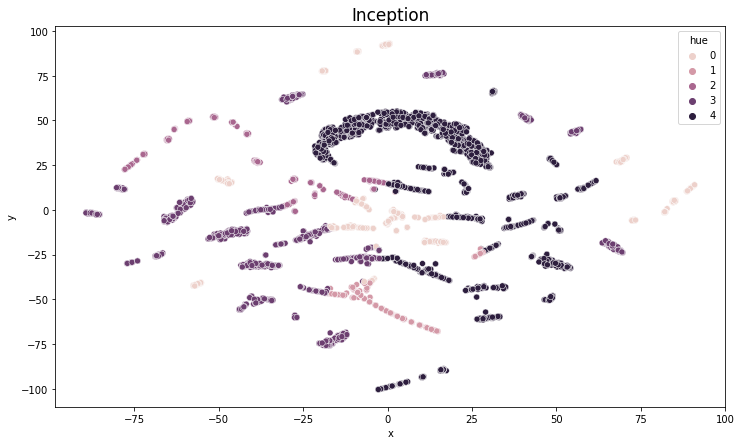

In [17]:
# plot of reduced dimensionality for Inception
fig, ax = plt.subplots(figsize =(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Inception', fontsize = 17)
plt.savefig('images/tsne_inception.jpg')

# Ingrid Goes West

## LDA 

In [18]:
#read in Ingrid Goes West csv
IngridGoesWest = pd.read_csv('IngridGoesWest.csv')
IngridGoesWest.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369


In [19]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in IngridGoesWest['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [20]:
#stemmed words of tweets
ps = PorterStemmer()

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [21]:
#add stemmed words into dataframe

#stemmed words list
IngridGoesWest['stemmed'] = stemmed_tweets

#stemmed words tweet
stemmed_tweets_lst = []
for tweet in IngridGoesWest['stemmed'].tolist():
    stemmed_tweets_lst.append(" ".join(tweet))

IngridGoesWest['string_stemmed'] = stemmed_tweets_lst

IngridGoesWest.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,retweet_date,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-23 18:50:34,Another day another avocado toast. #avocadotoa...,en,"['avocadotoast', 'ingridgoeswest', '31days31ph...",ShepherdGirl,https://twitter.com/ShepherdGirl/status/103276...,False,0,0,0,NaN,0.0000,0.000,0.000,1.000,0.0000,"[anoth, day, anoth, avocado, toast, avocadotoa...",anoth day anoth avocado toast avocadotoast ing...
1,2018-08-23 17:32:00,#IngridGoesWest is a total package when you wa...,en,['ingridgoeswest'],BisiAdediran,https://twitter.com/BisiAdediran/status/103274...,False,0,0,0,NaN,0.3400,0.111,0.062,0.827,0.3400,"[ingridgoeswest, total, packag, want, advis, s...",ingridgoeswest total packag want advis sorri a...
2,2018-08-23 13:00:47,44. Step 45. The dark tower 46. Ingrid goes we...,en,[],wawalily247,https://twitter.com/wawalily247/status/1032674...,False,0,0,0,NaN,0.4404,0.083,0.000,0.917,0.4404,"[44, step, 45, dark, tower, 46, ingrid, goe, w...",44 step 45 dark tower 46 ingrid goe west 47 na...
3,2018-08-23 04:13:02,INGRID GOES WEST [Official Teaser] - August 20...,en,[],ScreenTweet,https://twitter.com/ScreenTweet/status/1032541...,False,0,0,0,NaN,-0.2500,0.000,0.182,0.818,-0.2500,"[ingrid, goe, west, offici, teaser, august, 20...",ingrid goe west offici teaser august 2017 neon...
4,2018-08-23 02:50:58,two movies own my whole heart and that is the ...,en,[],didntifade,https://twitter.com/didntifade/status/10325205...,False,1,0,0,NaN,0.6369,0.208,0.000,0.792,0.6369,"[two, movi, whole, heart, king, summer, ingrid...",two movi whole heart king summer ingrid goe west


In [22]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(IngridGoesWest['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,03,03r1y4v3l2,03ug2g0kfi,05,05mfzdgjrf,06,07,...,zvq9zr3hg,zvvrqycogw,zvyagintsev,zwfil4zopz,zwskaxpq6k,zx6079v1w9,zz31znmrok,zzbhlcobxr,zztd7pzbvc,zztopport
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#dictionary of numbers matched with words
dictionary = corpora.Dictionary(IngridGoesWest['stemmed'])

In [24]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in IngridGoesWest['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [25]:
#running LDA model for Ingrid Goes West
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.096*"ingrid" + 0.094*"goe" + 0.094*"west" + 0.025*"watch" + 0.017*"movi" + 0.010*"aubrey" + 0.010*"plaza" + 0.009*"good" + 0.007*"2017" + 0.006*"win"
Topic 1 
Words: 0.064*"ingridgoeswest" + 0.018*"win" + 0.014*"evilhag" + 0.012*"aubreyplaza" + 0.009*"watch" + 0.009*"efcompetit" + 0.009*"film" + 0.008*"follow" + 0.008*"chanc" + 0.008*"dvd"
Topic 2 
Words: 0.044*"ingrid" + 0.042*"goe" + 0.041*"west" + 0.018*"ingridgoeswest" + 0.015*"movi" + 0.014*"watch" + 0.014*"social" + 0.013*"like" + 0.013*"media" + 0.008*"2017"
Topic 3 
Words: 0.026*"ingridgoeswest" + 0.019*"ingrid" + 0.019*"goe" + 0.018*"west" + 0.013*"watch" + 0.012*"movi" + 0.009*"best" + 0.009*"featur" + 0.008*"first" + 0.008*"film"
Topic 4 
Words: 0.029*"ingrid" + 0.028*"west" + 0.028*"goe" + 0.013*"10" + 0.012*"ingridgoeswest" + 0.009*"movi" + 0.008*"2017" + 0.008*"project" + 0.008*"florida" + 0.007*"2"


In [26]:
#Display Ingrid Goes West model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_ingridgoeswest.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.101547  0.048033       1        1  48.242113
2      0.080034  0.077675       2        1  20.924079
4      0.047259 -0.152124       3        1  14.085114
3     -0.065198  0.004244       4        1   9.372281
1     -0.163642  0.022172       5        1   7.376413, topic_info=                Term        Freq        Total Category  logprob  loglift
5     ingridgoeswest  944.000000   944.000000  Default  30.0000  30.0000
1392             win  290.000000   290.000000  Default  29.0000  29.0000
71           evilhag  309.000000   309.000000  Default  28.0000  28.0000
817               10  130.000000   130.000000  Default  27.0000  27.0000
2059             dvd  228.000000   228.000000  Default  26.0000  26.0000
...              ...         ...          ...      ...      ...      ...
44               goe   29.089003  3741.653788   Topic5  -5.0572  -2.2500
46            ingrid   28.965391  3831.674577   Topic5  -5.0615  -2.2781
54              west   27.672028  3719.820669   Topic5  -5.1072  -2.2941
257        instagram   11.902490   161.082265   Topic5  -5.9509   0.0017
180             last   11.782429   169.367835   Topic5  -5.9610  -0.0586

[357 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
214       1  0.181260           1
214       2  0.271890           1
214       3  0.487136           1
214       4  0.056644           1
214       5  0.011329           1
...     ...       ...         ...
5792      1  0.893448  xunlwectek
5751      1  0.893438  y4ldygbijo
5522      4  0.942005     yodajon
5785      1  0.893543   you7c8cjr
1560      5  0.625416  zajnuyjyiq

[700 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 4, 2])

Topic 1 - ingrid, goe, west, watch, movi, aubrey, plaza, good, 2017, win, dvd, love, film, ingridgoeswest, like, heyuguy, click, evilhag, see, realli, best, elizabeth, olsen, time, hulu, instagram, great, one, think, media

Topic 2 - ingrid, goe, west, ingridgoeswest, movi, watch, social, like, media, 2017, realli, shea, comedi, love, jackson, obsess, feel, evilhag, jr, seen, plaza, want, peopl, aubrey, charact, great, make, film, end, dark

Topic 3 - ingrid, west, goe, 10, ingridgoeswest, movi, 2017, project, florida, 2, good, 5, big, sick, blade, runner, time, stori, 2049, 8, 3, wathc, film, 6, ladi, 7, logan, tonya, 1, 4

Topic 4 - ingridgoeswest, ingrid, goe, west, watch, movi, best, featur, first, film, award, spirit, ray, blu, last, spiritaward, win, tv, evilhag, want, episod, bird, ladi, independ, 2017, thing, dvd, battleoffthesex, good, neon

Topic 5 - ingridgoeswest, win, evilhag, aubreyplaza, watch, efcompetit, film, follow, chac, dvd, osheajacksonjr, competit, cs, prize, goe, comp, ingrid, like, west, spiritaward, best, love, featur, first, great, see, need, perform, instagram, last

## TSNE 

In [27]:
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])       
# X

In [28]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

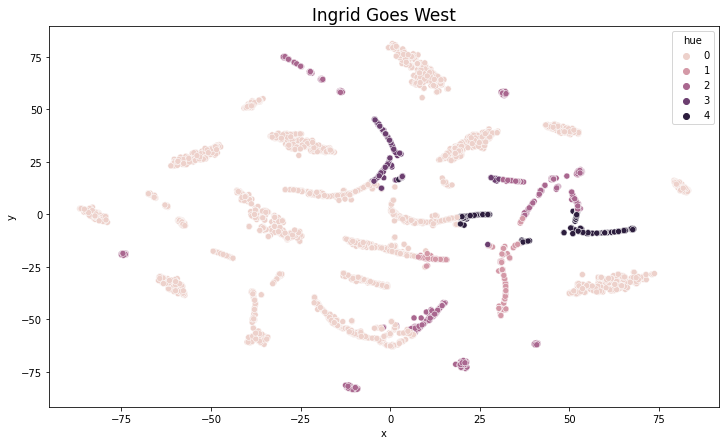

In [29]:
#t-sne plot 
fig, ax = plt.subplots(figsize =(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Ingrid Goes West', fontsize = 17)
plt.savefig('images/tsne_ingridgoeswest.jpg')

# Big Sick

## LDA

In [12]:
#read in the Big Sick
BigSick = pd.read_csv('BigSick.csv')
BigSick.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785


In [13]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigSick['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [14]:
#stemming tweets

stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [15]:
#adding to Big Sick dataframe 

#stemmed tweets list version
BigSick['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in BigSick['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

BigSick['string_stemmed'] = stemmed_tweets_str_lst

BigSick.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-07-12 19:40:09,@kumailn I just saw the Big Sick and you are a...,en,[],lellomoke,https://twitter.com/lellomoke/status/101755423...,False,0,0,0,0.7384,0.245,0.095,0.660,0.7384,"[kumailn, saw, big, sick, amaz, happi, wife, r...",kumailn saw big sick amaz happi wife recov
1,2018-07-12 19:25:45,@kumailn Just finished The Big Sick. It was s...,en,[],klingerock,https://twitter.com/klingerock/status/10175506...,False,0,0,0,0.3268,0.274,0.195,0.531,0.3268,"[kumailn, finish, big, sick, fuck, good]",kumailn finish big sick fuck good
2,2018-07-12 19:02:35,I added a video to a @YouTube playlist https:...,en,[],TheRedShamrock,https://twitter.com/TheRedShamrock/status/1017...,False,0,0,0,-0.5106,0.000,0.202,0.798,-0.5106,"[ad, video, youtub, playlist, 3oxcf1nudi, s5e2...",ad video youtub playlist 3oxcf1nudi s5e29 2017...
3,2018-07-12 17:22:11,@kumailn damn why did I just now watch the big...,en,[],hanneskaeufler,https://twitter.com/hanneskaeufler/status/1017...,False,1,1,0,-0.4017,0.172,0.301,0.527,-0.4017,"[kumailn, damn, watch, big, sick, realli, enjoy]",kumailn damn watch big sick realli enjoy
4,2018-07-12 15:39:02,At the beginning of a relationship: “omg you’r...,en,[],EwdatsGROSS,https://twitter.com/EwdatsGROSS/status/1017493...,False,34,0,3,0.0785,0.182,0.176,0.642,0.0785,"[begin, relationship, omg, funni, love, sens, ...",begin relationship omg funni love sens humour ...


In [16]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigSick['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,007,00pm,01,02,025,02uemq83hd,03,03mz3dbxtl,...,ztbqrlfr7j,zto8ktfnwv,ztxyln1gso,zucchini,zucker,zumanurr,zve60sra4b,zw1ukjimji,zy3pcbgrrv,zzo9yhxcjp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigSick['stemmed'])

In [18]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in BigSick['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [19]:
#running LDA model for The Big Sick
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
#created a for loop to seperate Topic and Words for clairty
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.052*"big" + 0.052*"sick" + 0.010*"2017" + 0.010*"like" + 0.009*"movi" + 0.007*"2" + 0.006*"film" + 0.005*"10" + 0.005*"3" + 0.005*"year"
Topic 1 
Words: 0.081*"big" + 0.079*"sick" + 0.027*"watch" + 0.015*"movi" + 0.013*"good" + 0.009*"kumailn" + 0.009*"like" + 0.008*"2017" + 0.008*"realli" + 0.007*"film"
Topic 2 
Words: 0.061*"big" + 0.059*"sick" + 0.015*"movi" + 0.008*"kumailn" + 0.007*"watch" + 0.005*"best" + 0.005*"think" + 0.005*"gt" + 0.005*"5" + 0.004*"seen"
Topic 3 
Words: 0.083*"big" + 0.083*"sick" + 0.027*"kumailn" + 0.020*"love" + 0.017*"watch" + 0.015*"movi" + 0.012*"kumail" + 0.009*"nanjiani" + 0.008*"great" + 0.006*"valley"
Topic 4 
Words: 0.029*"big" + 0.028*"sick" + 0.008*"film" + 0.007*"love" + 0.004*"watch" + 0.004*"like" + 0.003*"us" + 0.003*"seen" + 0.003*"babi" + 0.003*"call"


In [20]:
#Display Big Sick LDA
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_bigsick.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.066695  0.021478       1        1  33.708444
3      0.113057 -0.045753       2        1  31.251455
0     -0.056080  0.116075       3        1  16.764834
2     -0.017522  0.005700       4        1  12.723900
4     -0.106151 -0.097499       5        1   5.551368, topic_info=         Term         Freq        Total Category  logprob  loglift
31       love   610.000000   610.000000  Default  30.0000  30.0000
1         big  4839.000000  4839.000000  Default  29.0000  29.0000
6        sick  4764.000000  4764.000000  Default  28.0000  28.0000
3     kumailn   881.000000   881.000000  Default  27.0000  27.0000
402  nanjiani   205.000000   205.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
269      name     6.480569    70.664419   Topic5  -6.3641   0.5020
16      video     6.169191    59.120206   Topic5  -6.4133   0.6311
112     never     6.176389    61.182103   Topic5  -6.4121   0.5980
106     first     6.325852   103.476083   Topic5  -6.3882   0.0964
648      girl     5.972397    77.739886   Topic5  -6.4457   0.3249

[385 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
6585      3  0.812505  0utxlznydf
342       1  0.298193           1
342       2  0.057345           1
342       3  0.550510           1
342       4  0.091752           1
...     ...       ...         ...
3653      5  0.902138        zayn
1431      1  0.031520   zoeinthec
1431      2  0.851051   zoeinthec
1431      3  0.031520   zoeinthec
1431      4  0.063041   zoeinthec

[801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

From the LDA model ...

Topic 1 - big, sick, watch, movie, good, kumalin, like, 2017, realli, film, time, one, final, love, seen, know, best, stori, go, see, amazon, last, end, 10, year, also, rom, cri, saw, make 

Topic 2 - big, sick, kumailn, love, watch, movi, kumail, nanjiani, great, valley, comedi, silicon, emilyvgordon, michael, thank, showalt, talk, deal, good, like emili, fear, failur, time, 2017, day, one, dilm, much, final

Topic 3 - big, sick, 2017, like, movi, 2, film, 10, 3, year, ladi, great, water, bird, 2010, 2016, la, 2014, 2013, 2015, 7, oscar, 1, shape, billboard, best, kumailin, last

Topic 4 - big, sick, movi, kumailn, wathc, best, think, gt, 5, seen, see, film, one, make, ray, 2, 4, ladi, project, good, night, 3, florida, romano, want, last, 2049, oscar, bird, could

Topic 5 - big, sick, film, love, watch, like, us, seen, babi, call, think, see, tri, netflix, loo, read, incred, thank, perfect, live, without, cultur, everi, clash, name, first, never, video, went, girl

There isn't much clarity when deciphering between topics. Topic 1 seems to be about the movie itself. Topic 2 seems to be about the actors since multiple names are brought up. Topic 3 is predominately numbers and words like billboard and oscar lead me to believe topic 3 is about ratings and winning awards. I could not make sense of topic 4 and 5. The words used seem very random. 

## Big Sick TSNE 

In [51]:
#LDA matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [52]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X)) #make matrix into an array
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

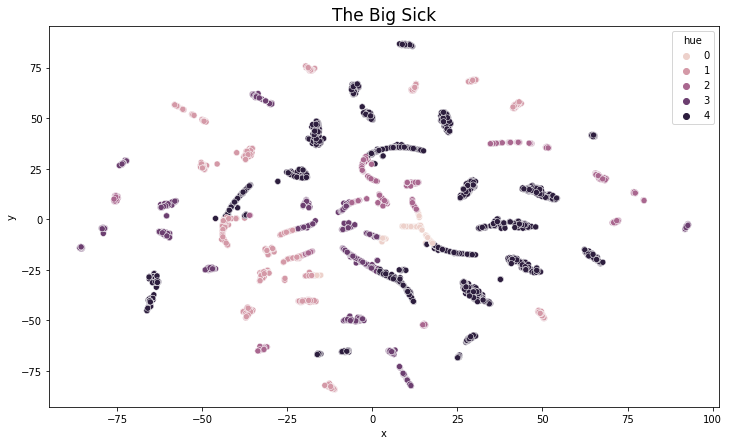

In [54]:
#plot of reduced dimensionality for the movie Big Sick
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax=ax,
    data=embedding)
plt.title('The Big Sick', fontsize = 17)
plt.savefig('images/tsne_bigsick.jpg')

# Gone Girl

## LDA

In [30]:
#read in Gone Girl csv
GoneGirl = pd.read_csv('GoneGirl.csv')
GoneGirl.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005


In [31]:
#tokenizing each tweet
tokenized_tweets_GoneGirl = []
for tweet in GoneGirl['tweet']:
    tokenized_tweets_GoneGirl.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_GoneGirl

In [32]:
#stemming each tweet
stemmed_tweets=[]
for tweet in tokenized_tweets_GoneGirl:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [33]:
#adding to Gone Girl dataframe 

#stemmed tweets list version
GoneGirl['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in GoneGirl['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

GoneGirl['string_stemmed'] = stemmed_tweets_str_lst

GoneGirl.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2015-10-01 19:49:05,(#UntilDawn spoilers) HE GONE GIRL'D HIS PHALA...,en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497327...,False,1,1,0,"{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'comp...",0.000,0.299,0.701,-0.5904,"[untildawn, spoiler, gone, girl, phalang, enou...",untildawn spoiler gone girl phalang enough cri...
1,2015-10-01 19:48:58,@chlomeganda gone girl chloeeee :),en,[],ChanwooCheeks,https://twitter.com/ChanwooCheeks/status/64973...,False,0,1,0,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.429,0.000,0.571,0.4588,"[chlomeganda, gone, girl, chloeeee]",chlomeganda gone girl chloeeee
2,2015-10-01 19:48:09,"(#UntilDawn spoilers) OPEN THE BEAR TRAP, CRY....",en,['untildawn'],bradyonetta,https://twitter.com/bradyonetta/status/6497325...,False,0,1,0,"{'neg': 0.407, 'neu': 0.593, 'pos': 0.0, 'comp...",0.000,0.407,0.593,-0.7824,"[untildawn, spoiler, open, bear, trap, cri, go...",untildawn spoiler open bear trap cri gone girl...
3,2015-10-01 19:46:52,Suspect indicted in Vallejo 'Gone Girl' kidnap...,en,[],OmarAzimi,https://twitter.com/OmarAzimi/status/649732240...,False,1,0,0,"{'neg': 0.104, 'neu': 0.896, 'pos': 0.0, 'comp...",0.000,0.104,0.896,-0.2960,"[suspect, indict, vallejo, gone, girl, kidnap,...",suspect indict vallejo gone girl kidnap case h...
4,2015-10-01 19:45:48,Gone Girl is a fucking crazy movie #thumbsup,en,['thumbsup'],kempatsu,https://twitter.com/kempatsu/status/6497319736...,False,1,0,0,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",0.000,0.278,0.722,-0.4005,"[gone, girl, fuck, crazi, movi, thumbsup]",gone girl fuck crazi movi thumbsup


In [34]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(GoneGirl['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000th,01,02,039,04utpoqzdk,06izylta51,06zxxykdsj,07wgg3sjh9,08fi9pg6oi,...,zt,zta9g7kncl,ztksz6zurr,zulaikhafadir,zulfikamohd,zurich,zusak,zv7jly9wel,zvuwfji59v,zzts2ihfdp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#numbers to words dictionary
dictionary = corpora.Dictionary(GoneGirl['stemmed'])

In [36]:
#bag of words
corpus = []
for tweet in GoneGirl['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [37]:
#running LDA model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.113*"gone" + 0.113*"girl" + 0.054*"watch" + 0.016*"time" + 0.009*"film" + 0.007*"first" + 0.006*"gonegirl" + 0.005*"book" + 0.005*"best" + 0.004*"good"
Topic 1 
Words: 0.094*"girl" + 0.089*"gone" + 0.056*"movi" + 0.017*"like" + 0.014*"gonegirl" + 0.014*"good" + 0.013*"watch" + 0.010*"read" + 0.009*"seen" + 0.008*"ever"
Topic 2 
Words: 0.152*"girl" + 0.137*"gone" + 0.022*"watch" + 0.013*"read" + 0.013*"train" + 0.011*"join" + 0.010*"qwqgukxak4" + 0.009*"fuck" + 0.009*"crazi" + 0.008*"gonegirl"
Topic 3 
Words: 0.044*"girl" + 0.043*"gone" + 0.036*"gonegirl" + 0.022*"28" + 0.018*"ladymaryordi" + 0.018*"abeymarindo" + 0.013*"aldubebforlov" + 0.010*"jaycahcomedia" + 0.009*"flynn" + 0.009*"gillian"
Topic 4 
Words: 0.080*"girl" + 0.078*"gone" + 0.030*"flynn" + 0.030*"gillian" + 0.018*"book" + 0.017*"love" + 0.012*"read" + 0.007*"11" + 0.007*"withdraw" + 0.007*"review"


In [38]:
#Display Gone Girl LDA model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_gonegirl.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.093974  0.053376       1        1  29.612733
1     -0.072728 -0.060396       2        1  24.474752
0     -0.053893  0.048050       3        1  22.493001
4      0.061749 -0.100214       4        1  12.556170
3      0.158846  0.059184       5        1  10.863344, topic_info=         Term        Freq       Total Category  logprob  loglift
26       movi  675.000000  675.000000  Default  30.0000  30.0000
191     flynn  192.000000  192.000000  Default  29.0000  29.0000
56    gillian  191.000000  191.000000  Default  28.0000  28.0000
98      watch  898.000000  898.000000  Default  27.0000  27.0000
43   gonegirl  471.000000  471.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
61       read   19.125559  347.313033   Topic5  -5.4215  -0.6794
98      watch   19.901355  898.569697   Topic5  -5.3817  -1.5902
512       new   11.211805   55.405799   Topic5  -5.9555   0.6221
281       end   11.212668  130.280327   Topic5  -5.9555  -0.2329
26       movi   11.913078  675.015219   Topic5  -5.8949  -1.8173

[329 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
225       3  0.036931       1
225       5  0.923264       1
616       1  0.721377      10
616       2  0.072138      10
616       3  0.180344      10
...     ...       ...     ...
486       3  0.266935    year
486       4  0.246402    year
486       5  0.102667    year
673       2  0.706798  youtub
673       3  0.270246  youtub

[595 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 5, 4])

Topic 1 - girl, gone, watch, read, train, join, qwqgukxax4, fuck, crazi, gonegirl, suspens, movi, learn, writer, ramwrit, good, nw, comparison, vs, fair, bitch, like, film, final, coupl, citi, kidnap, california, file, claim

Topic 2 - girl, gone, movi, like, gonegirl, good, watch, read, seen, ever, end, ben, love, book, affleck, realli, one, fuck, pike, rosamund, never, twist, great, crazi, shit, look, youtub, review, video, hate

Topic 3 - gone, girl, watch, time, film, first, gonegirl, book, best, good, fincher, think, david, ami, last, scene, like, 2014, via, say, night, ever, hd, everi, day, grey, shade, amaz, 50, better

Topic 4 - girl, gone, flynn, gillian, book, love, read, 11, withdraw, review, gonegirl, movi, done, novel, time, good, think, go, feel, like, still, thriller, ami, news, benaffleck, watch, much, great, lol, latest

Topic 5 - girl, gone, gonegirl, 28, ladymaryordi, abeymarindo, aldubebforlov, jaycahcomedia, flynn, gillian, iamusagi003, gt, 5, book, 1, 2, watch, read, think, way, 3, 4, star, happi, movi, start, talk, new, end, author

## TSNE 

In [39]:
#create matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [40]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

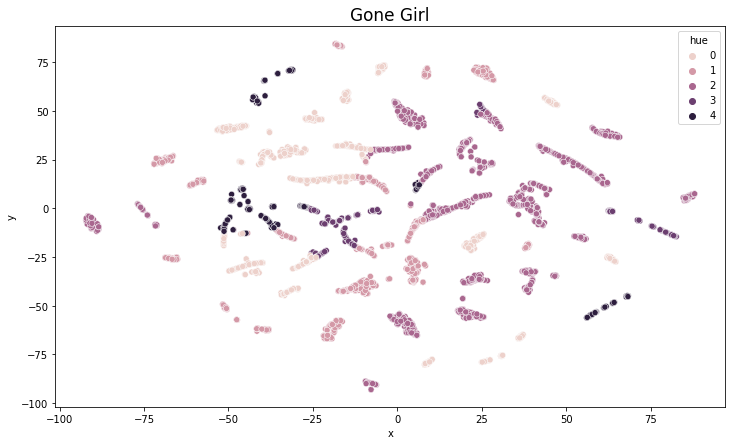

In [41]:
#plot of reduced dimensionality for Gone Girl
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Gone Girl', fontsize = 17)
plt.savefig('images/tsne_gonegirl.jpg')

# 17 Again

## LDA 

In [12]:
#read in 17 Again
Again17 = pd.read_csv('Again17.csv')
Again17.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552


In [13]:
#tokenizing each tweet
tokenized_tweets_17Again = []
for tweet in Again17['tweet']:
    tokenized_tweets_17Again.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets_17Again

In [14]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets_17Again:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [15]:
#adding to 17 Again to dataframe 

#stemmed tweets list version
Again17['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in Again17['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

Again17['string_stemmed'] = stemmed_tweets_str_lst

Again17.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-04-12 19:44:15,http://bit.ly/bqye6j where can i get a dress ...,en,[],MarleneJenkins,https://twitter.com/MarleneJenkins/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bit, bqye6j, dress, similar, zac, posen, dres...",bit bqye6j dress similar zac posen dress vanes...
1,2010-04-12 19:28:20,watching 17 Again. :) i missed this movie.,en,[],EuniceHilario,https://twitter.com/EuniceHilario/status/12072...,False,0,0,0,"{'neg': 0.196, 'neu': 0.536, 'pos': 0.268, 'co...",0.268,0.196,0.536,0.2023,"[watch, 17, miss, movi]",watch 17 miss movi
2,2010-04-12 19:27:47,"@conallen haha not surprising. ""17 Again"" seem...",en,[],sunnyjac0b,https://twitter.com/sunnyjac0b/status/12072044784,False,0,0,0,"{'neg': 0.076, 'neu': 0.675, 'pos': 0.249, 'co...",0.249,0.076,0.675,0.6232,"[conallen, haha, surpris, 17, seem, trigger, q...",conallen haha surpris 17 seem trigger quit con...
3,2010-04-12 19:25:32,"@tjlyricz just gonna watch 17 again, and you g...",en,[],desireefurlong,https://twitter.com/desireefurlong/status/1207...,False,0,0,0,"{'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...",0.136,0.000,0.864,0.4588,"[tjlyricz, gonna, watch, 17, gotta, loov, late...",tjlyricz gonna watch 17 gotta loov late night ...
4,2010-04-12 19:21:54,@jacobjunior7 yeah more boyish then which is w...,en,[],conallen,https://twitter.com/conallen/status/12071772509,False,0,0,0,"{'neg': 0.082, 'neu': 0.709, 'pos': 0.21, 'com...",0.210,0.082,0.709,0.4552,"[jacobjunior7, yeah, boyish, realli, pay, atte...",jacobjunior7 yeah boyish realli pay attent saw...


In [16]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(Again17['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,02,021010,03,04,05,06,07,08,...,zoeblais2010zo,zomg,zone,zoo,zoom,zoradarosa,zqaddict,zxfsb,zzzdaria,zzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(Again17['stemmed'])

In [18]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in Again17['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [19]:
#running LDA model for the movie 17 Again
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.146*"17" + 0.089*"watch" + 0.032*"movi" + 0.027*"zac" + 0.022*"efron" + 0.017*"love" + 0.009*"3" + 0.006*"time" + 0.006*"good" + 0.006*"like"
Topic 1 
Words: 0.066*"17" + 0.015*"like" + 0.012*"17again" + 0.008*"gt" + 0.008*"think" + 0.007*"feel" + 0.007*"treat" + 0.006*"film" + 0.006*"wish" + 0.006*"boy"
Topic 2 
Words: 0.100*"17" + 0.045*"watch" + 0.017*"zac" + 0.016*"efron" + 0.015*"like" + 0.010*"movi" + 0.009*"good" + 0.007*"one" + 0.007*"haha" + 0.006*"lol"
Topic 3 
Words: 0.077*"17" + 0.041*"zoeblai" + 0.018*"4" + 0.018*"win" + 0.018*"beauti" + 0.017*"tweet" + 0.016*"person" + 0.016*"pack" + 0.016*"prize" + 0.016*"piec"
Topic 4 
Words: 0.100*"17" + 0.026*"movi" + 0.023*"watch" + 0.022*"zac" + 0.021*"efron" + 0.019*"lol" + 0.012*"watchin" + 0.009*"like" + 0.009*"funni" + 0.007*"17again"


In [20]:
#display LDA model for the movie 17 Again
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_17again.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.096479  0.066597       1        1  32.387488
4      0.052165  0.008439       2        1  24.843405
2      0.046313 -0.005657       3        1  18.700648
3     -0.164903  0.064432       4        1  13.716727
1     -0.030054 -0.133812       5        1  10.351733, topic_info=         Term         Freq        Total Category  logprob  loglift
4943  zoeblai   233.000000   233.000000  Default  30.0000  30.0000
13      watch  1767.000000  1767.000000  Default  29.0000  29.0000
945       win   103.000000   103.000000  Default  28.0000  28.0000
763     tweet    99.000000    99.000000  Default  27.0000  27.0000
378    beauti   109.000000   109.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
17       haha    14.153243   127.604415   Topic5  -5.6890   0.0690
149      love    18.548713   389.878822   Topic5  -5.4186  -0.7774
54      efron    20.822837   637.211937   Topic5  -5.3029  -1.1530
10        zac    19.933839   729.707950   Topic5  -5.3466  -1.3322
1         bit    13.605217   152.493418   Topic5  -5.7285  -0.1487

[367 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
4956      1  0.011504    100th
4956      3  0.011504    100th
4956      4  0.977873    100th
0         1  0.437290       17
0         2  0.229296       17
...     ...       ...      ...
10        4  0.006852      zac
10        5  0.027408      zac
4943      1  0.008548  zoeblai
4943      3  0.004274  zoeblai
4943      4  0.983077  zoeblai

[703 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 4, 2])

Topic 1 - 17, watch, like, movi, love, lol, feel, go, im, funni, gonna, net, html, see, onlinemoviesfre, haha, watchin, make, 17again, need, p, nowwatch, man, night, w, omg, look, young, still, time

Topic 2 - 17, movi, watch, zac, efron, lol, watchin, like, funni, 17again, love, good, go, best, bit, actual, make, 3, look, perri, pretti, think, vote, hot, matthew, new, realli, q, im, feel

Topic 3 - 17, watch, zac, efron, like, movi, good, one, haha, lol, go, love, 2, feel, finish, ye, im, want, seen, look, make, night, back, time, steri, knight, day, would, need, think

Topic 4 - 17, zoeblai, 4, win, beauti, tweet, person, pack, prize, piec, 100th, movi, like, feel, watch, love, young, end, know, realli, everyth, make, go, apo, world, 17again, begin, bit, look, new

Topic 5 - 17, like, 17again, gt, think, feel, treat, film, wish, boy, 2, one, time, set, efron, zac, would, gonna, could, make, love, day, listen, meet, way, sun, haha, rise, bit, desserv

## TSNE 

In [21]:
#LDA matrix results
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [22]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

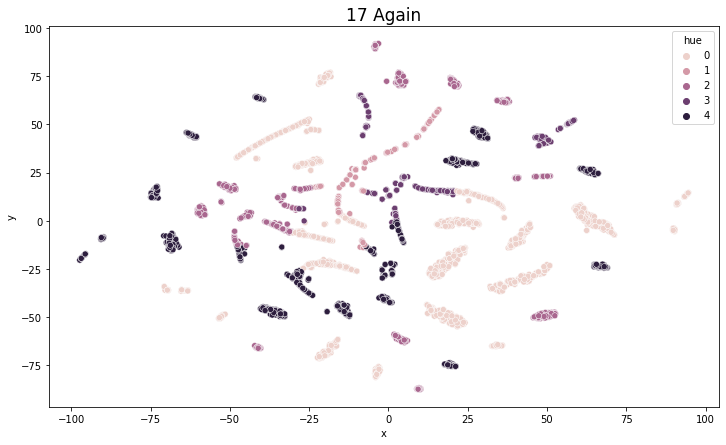

In [23]:
#plot reduce dimensionality for the movie 17 Again
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.title('17 Again', fontsize = 17)
plt.savefig('images/tsne_17again')

# Jennifer's Body

## LDA 

In [24]:
#read in the Big Sick
JennifersBody = pd.read_csv('JennifersBody.csv')
JennifersBody.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070


In [25]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in JennifersBody['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
    
# tokenized_tweets

In [26]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)

# stemmed_tweets

In [27]:
#adding to Jennifer's Body dataframe 

#stemmed tweets list version
JennifersBody['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in JennifersBody['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

JennifersBody['string_stemmed'] = stemmed_tweets_str_lst

JennifersBody.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2010-09-16 19:57:28,I'll wear my Jennifer's Body shirt and red and...,en,[],gogoalexranger,https://twitter.com/gogoalexranger/status/2470...,False,0,0,0,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.189,0.000,0.811,0.5411,"[wear, jennif, bodi, shirt, red, black, scarf,...",wear jennif bodi shirt red black scarf tomorro...
1,2010-09-16 18:40:07,"Watching Jennifer's Body with Erin & Jess, the...",en,[],dull_life,https://twitter.com/dull_life/status/24703649087,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[watch, jennif, bodi, erin, jess, make, breakf...",watch jennif bodi erin jess make breakfast din...
2,2010-09-16 17:22:37,Ok I just threw up some black ropey stuff like...,en,[],advocatediaboli,https://twitter.com/advocatediaboli/status/246...,False,0,0,0,"{'neg': 0.29, 'neu': 0.532, 'pos': 0.178, 'com...",0.178,0.290,0.532,-0.6037,"[ok, threw, black, ropey, stuff, like, jennif,...",ok threw black ropey stuff like jennif bodi st...
3,2010-09-16 16:59:37,The Jennifer's Body soundtrack is so good. If ...,en,[],TheKatValentine,https://twitter.com/TheKatValentine/status/246...,False,0,0,0,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.223,0.000,0.777,0.5777,"[jennif, bodi, soundtrack, good, movi, decent]",jennif bodi soundtrack good movi decent
4,2010-09-16 16:05:32,'Jennifer's body' is possibly one of the worst...,en,[],_BeckyHart,https://twitter.com/_BeckyHart/status/24693353486,False,0,0,0,"{'neg': 0.258, 'neu': 0.742, 'pos': 0.0, 'comp...",0.000,0.258,0.742,-0.8070,"[jennif, bodi, possibl, one, worst, film, watc...",jennif bodi possibl one worst film watch year ...


In [28]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(JennifersBody['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,01,02,03,039,06,07,08,09,...,zhane,zig,zk3y3icz,zombi,zombieland,zondara,zone,zooland,zq,zulhamyoga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(JennifersBody['stemmed'])

In [30]:
#list of words to bag of words format
corpus = []
for tweet in JennifersBody['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [31]:
#run LDA model for Jennifer's Body
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.063*"jennif" + 0.062*"bodi" + 0.026*"movi" + 0.013*"love" + 0.010*"fuck" + 0.009*"bit" + 0.007*"review" + 0.006*"stupid" + 0.005*"39" + 0.005*"megan"
Topic 1 
Words: 0.088*"jennif" + 0.087*"bodi" + 0.024*"movi" + 0.022*"fox" + 0.021*"megan" + 0.013*"watch" + 0.012*"ever" + 0.009*"like" + 0.007*"bad" + 0.007*"low"
Topic 2 
Words: 0.112*"jennif" + 0.112*"bodi" + 0.023*"watch" + 0.021*"movi" + 0.017*"fox" + 0.017*"megan" + 0.009*"good" + 0.007*"watchin" + 0.007*"choic" + 0.007*"bit"
Topic 3 
Words: 0.128*"bodi" + 0.127*"jennif" + 0.082*"watch" + 0.028*"movi" + 0.012*"megan" + 0.012*"fox" + 0.011*"lol" + 0.009*"time" + 0.006*"like" + 0.006*"love"
Topic 4 
Words: 0.082*"jennif" + 0.082*"bodi" + 0.021*"nowwatch" + 0.016*"movi" + 0.009*"bit" + 0.009*"like" + 0.008*"gt" + 0.007*"adam" + 0.007*"brodi" + 0.007*"shit"


In [32]:
#display LDA model for Jennifer's Body
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_jennifersbody.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.081204 -0.018614       1        1  38.743431
2     -0.058955  0.001498       2        1  27.811526
1     -0.038100  0.051082       3        1  15.629537
4      0.068413 -0.102675       4        1  10.660515
0      0.109846  0.068709       5        1   7.154991, topic_info=         Term         Freq        Total Category  logprob  loglift
15      watch  1761.000000  1761.000000  Default  30.0000  30.0000
2      jennif  4622.000000  4622.000000  Default  29.0000  29.0000
1        bodi  4617.000000  4617.000000  Default  28.0000  28.0000
126  nowwatch   101.000000   101.000000  Default  27.0000  27.0000
26       movi  1044.000000  1044.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
16       like    13.554084   300.717103   Topic5  -5.4253  -0.4621
473    horror    10.193032   123.516062   Topic5  -5.7103   0.1427
112     megan    14.792199   580.164157   Topic5  -5.3379  -1.0319
43        fox    12.920609   589.649097   Topic5  -5.4732  -1.1833
233       lol     7.947466   267.930611   Topic5  -5.9591  -0.8805

[364 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1796      3  0.903885         039
1797      3  0.775693          06
1797      4  0.129282          06
469       2  0.098258          12
469       4  0.687805          12
...     ...       ...         ...
91        1  0.280156         yet
91        2  0.684825         yet
91        3  0.031128         yet
504       1  0.177821  zombieland
504       3  0.711285  zombieland

[631 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

Topic 1 - bodi, jennif, watch, movi, megan, fox, lol, time, like, love, weird, one, go, good, see, first, shit, bit, seen, ever, funni, 3, finish, realli, tonight, stupid, day, suck, want, bad

Topic 2 - jennif, bodi, watch, movi, fox, megan, good, watchin, choic, bit, like, seen, nw, night, horrow, actress, crazi, lol, thriller, amanda, last, realli, seyfri, award, video, say, love, teen, see, think

Topic 3 - jennif, bodi, movi, fox, megan, watch, ever, like, bad, low, film, 3, tree, shoulder, worst, seen, bit, love, good, eat, soundtrack, know, nowplay, star, realli, time, see, wtf, ye, go

Topic 4 - jennif, bodi, nowwatch, movi, bit, like, gt, adam, brodi, shit, ass, love, lol, funni, watch, crazi, think, tri, 2009, watchin, bad, fox, took, megan, 2, aaaaaaaaaaaaaaaaaahhhhhhhhhhh, fuck, realli, friend, 3

Topic 5 - jennif, bodi, movi, love, fuck, bit, review, stupid, 39, megan, hole, kusama, teenag, karyn, like, fox, gil, rut, moretz, horror, director, chloe, dvd, gt, scari, mind, nowplay, lol, talk, person

## TSNE 

In [33]:
#reduce dimensionality
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [34]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

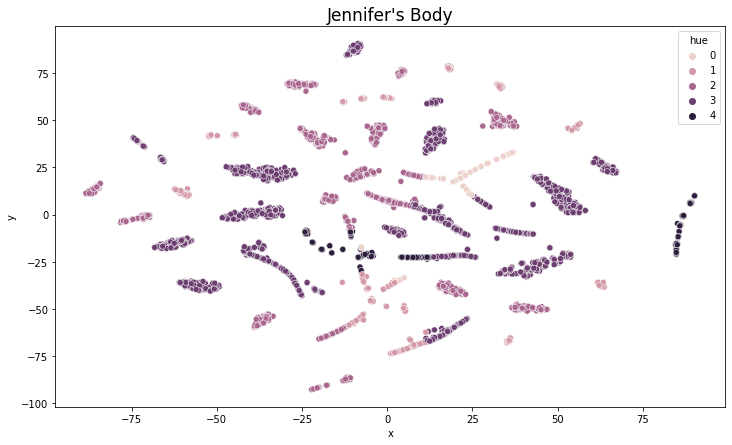

In [35]:
# Jennifer's Body plot of reduced dimensionality
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding,
    ax = ax)
plt.title("Jennifer's Body", fontsize = 17)
plt.savefig('images/tsne_jennifersbody.jpg')

# The Shape of Water

## LDA

In [36]:
#read in The Shape of Water
ShapeOfWater = pd.read_csv('ShapeOfWater.csv')
ShapeOfWater.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003


In [37]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in ShapeOfWater['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [38]:
#stemming tweets
stemmed_tweets=[]
for tweet in tokenized_tweets:
    stemmed_words = []
    for word in tweet:
        if word not in stopwords_list:
            stemmed_words.append(ps.stem(word))
    stemmed_tweets.append(stemmed_words)
# stemmed_tweets

In [39]:
#adding to The Shape of Water dataframe 

#stemmed tweets list version
ShapeOfWater['stemmed'] = stemmed_tweets

#string version
stemmed_tweets_str_lst = []
for tweet in ShapeOfWater['stemmed'].tolist():
    stemmed_tweets_str_lst.append(" ".join(tweet))

ShapeOfWater['string_stemmed'] = stemmed_tweets_str_lst

ShapeOfWater.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,stemmed,string_stemmed
0,2018-08-29 19:59:28,Fab and I watching shape of water together and...,en,[],kjimuseum,https://twitter.com/kjimuseum/status/103495371...,False,1,0,0,"{'neg': 0.115, 'neu': 0.697, 'pos': 0.188, 'co...",0.188,0.115,0.697,0.2732,"[fab, watch, shape, water, togeth, hate, heada...",fab watch shape water togeth hate headass must...
1,2018-08-29 19:43:01,📷 hellohousemouse: the shape of water model: ...,en,[],annestaggwrites,https://twitter.com/annestaggwrites/status/103...,False,0,0,0,"{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'comp...",0.218,0.000,0.782,0.5994,"[hellohousemous, shape, water, model, averi, v...",hellohousemous shape water model averi vulp ro...
2,2018-08-29 19:39:36,"""The Shape of Water is like alien Amelie, but ...",en,[],TheGreenGreek,https://twitter.com/TheGreenGreek/status/10349...,False,2,0,0,"{'neg': 0.241, 'neu': 0.586, 'pos': 0.173, 'co...",0.173,0.241,0.586,-0.4953,"[shape, water, like, alien, ameli, ameli, bett...",shape water like alien ameli ameli better stil...
3,2018-08-29 19:38:41,@CharlieWSwain That couple in “The Shape Of Wa...,en,[],cliffmarshall,https://twitter.com/cliffmarshall/status/10349...,False,1,0,0,"{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'comp...",0.091,0.000,0.909,0.2960,"[charliewswain, coupl, shape, water, babi, gre...",charliewswain coupl shape water babi grew beco...
4,2018-08-29 19:37:09,"More power to him. Sure beats the spew, prais...",en,[],biomom64,https://twitter.com/biomom64/status/1034948099...,False,0,0,0,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.188,0.000,0.812,0.7003,"[power, sure, beat, spew, prais, trump, come, ...",power sure beat spew prais trump come costar s...


In [40]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(ShapeOfWater['string_stemmed'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000x,00pm,01297,01425612393,018,02,0215madman,02mvwewkxo,03,...,ztq9uerwad,ztxmxhuphw,zujbgxhisa,zuldim,zvk56tlfg6,zvkewslwtd,zyli,zymmetra,zyrtigppmr,zzck2vlrfz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(ShapeOfWater['stemmed'])

In [42]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in ShapeOfWater['stemmed']:
    corpus.append(dictionary.doc2bow(tweet))

In [43]:
#run LDA model for the movie The Shape of Water
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics(-1):
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.011*"shape" + 0.011*"water" + 0.002*"creatur" + 0.002*"music" + 0.002*"look" + 0.002*"name" + 0.002*"beast" + 0.002*"le" + 0.001*"soundtrack" + 0.001*"black"
Topic 1 
Words: 0.083*"water" + 0.082*"shape" + 0.014*"del" + 0.014*"toro" + 0.012*"guillermo" + 0.010*"watch" + 0.010*"2017" + 0.010*"film" + 0.009*"movi" + 0.008*"oscar"
Topic 2 
Words: 0.058*"water" + 0.057*"shape" + 0.011*"movi" + 0.009*"love" + 0.008*"watch" + 0.007*"film" + 0.007*"fuck" + 0.006*"fish" + 0.006*"like" + 0.005*"beauti"
Topic 3 
Words: 0.072*"shape" + 0.070*"water" + 0.009*"fish" + 0.008*"watch" + 0.008*"like" + 0.007*"chang" + 0.007*"nanotub" + 0.006*"love" + 0.005*"think" + 0.005*"one"
Topic 4 
Words: 0.067*"water" + 0.065*"shape" + 0.019*"movi" + 0.012*"film" + 0.011*"watch" + 0.009*"like" + 0.007*"best" + 0.007*"good" + 0.005*"love" + 0.005*"2017"


In [44]:
#display LDA model for The Shape of Water
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_shapeofwater.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.081689 -0.026202       1        1  33.901261
1     -0.065261  0.088739       2        1  31.429874
3     -0.023747 -0.082819       3        1  16.156455
2     -0.008526  0.010390       4        1  15.532812
0      0.179222  0.009891       5        1   2.979597, topic_info=           Term         Freq        Total Category  logprob  loglift
113        toro   284.000000   284.000000  Default  30.0000  30.0000
108         del   294.000000   294.000000  Default  29.0000  29.0000
341   guillermo   256.000000   256.000000  Default  28.0000  28.0000
7         shape  4512.000000  4512.000000  Default  27.0000  27.0000
10        water  4543.000000  4543.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
2134       king     2.135642    28.784534   Topic5  -6.8184   0.9123
498         sea     2.153829    33.533930   Topic5  -6.8099   0.7681
240       world     2.192264    47.351510   Topic5  -6.7922   0.4407
528        know     2.289063   180.564953   Topic5  -6.7490  -0.8546
220      realli     2.286607   185.873977   Topic5  -6.7501  -0.8846

[393 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
226       1  0.684753     1
226       2  0.116060     1
226       3  0.116060     1
226       4  0.069636     1
834       1  0.847366    10
...     ...       ...   ...
60        1  0.369218  year
60        2  0.340816  year
60        3  0.187449  year
60        4  0.102245  year
7804      5  0.523235  yoga

[746 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

Topic 1 - water, shape, movi, film, watch, like, best, good, love, 2017, 2, 10, nanotub, 3, one, billboard, ladi, pictur, chang, win, three, bird, know, would, oscar, 5, time, see, year, realli

Topic 2 - water, shape, del, toro, guillermo, watch, 2017, film, movi, oscar, love, like, best, last, time, one, need, man, seen, think, popular, fish, know, year, anoth, creatur, realli, make, still, dir

Topic 3 - shape, water, fish, watch, like, chang, nanotub, love, think, one, best, scene, film, go, man, final, via, around, fuck, 2, 2018, see, find, year, guy, movi, pictur, peopl, also, realli

Topic 4 - water, shape, movi, love, watch, film, fuck, fish, like, beauti, see, also, monster, realli, peopl, new, think, saw, great, stori, want, man, know, world, soundtrack, time, thought, la, trailer, oscar

## TSNE 

In [45]:
#create LDA topic words matrix
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [46]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

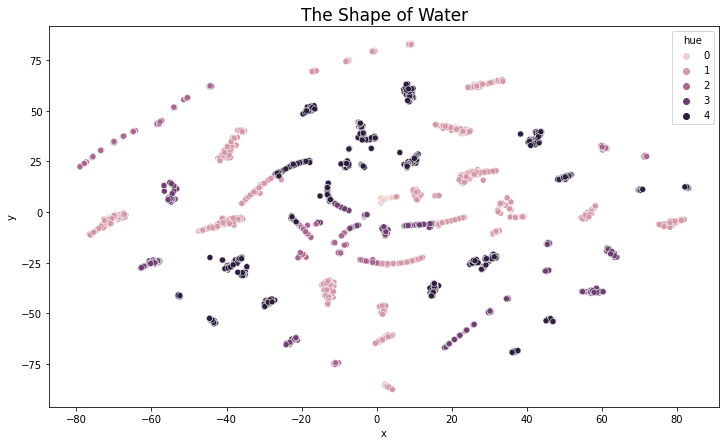

In [47]:
#plot of reduced dimensionality for The Shape of Water
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding,
    ax=ax)
plt.title('The Shape of Water', fontsize = 17)
plt.savefig('images/tsne_shapeofwater.jpg')

# The Big Short

## LDA 

In [48]:
#read in the Big Sick
BigShort = pd.read_csv('BigShort.csv')
BigShort.drop(columns=['Unnamed: 0'], axis = 1, inplace = True) 
BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [49]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BigShort['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [50]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [51]:
#adding to Big Short dataframe 

#lemmatized tweets list version
BigShort['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BigShort['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BigShort['string_lemmatized'] = lemmatized_tweets_str_lst

BigShort.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2016-12-09 18:57:58,"Just watched The Big Short. Fascinating film, ...",en,['thebigshort'],steveyroyal,https://twitter.com/steveyroyal/status/8073737...,False,0,0,0,"{'neg': 0.113, 'neu': 0.755, 'pos': 0.132, 'co...",0.132,0.113,0.755,0.1280,"[watched, big, short, fascinating, film, even,...",watched big short fascinating film even compre...
1,2016-12-09 18:57:57,Roger Ailes-Megyn Kelly Harassment Film in the...,en,[],RazzleTazzleMag,https://twitter.com/RazzleTazzleMag/status/807...,False,0,0,0,"{'neg': 0.194, 'neu': 0.722, 'pos': 0.083, 'co...",0.083,0.194,0.722,-0.4588,"[roger, ailes, megyn, kelly, harassment, film,...",roger ailes megyn kelly harassment film work b...
2,2016-12-09 18:56:04,The Big Short: is the next financial crisis on...,en,[],Okavangomick,https://twitter.com/Okavangomick/status/807373...,False,0,0,0,"{'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'comp...",0.000,0.272,0.728,-0.6249,"[big, short, next, financial, crisis, way, xiv...",big short next financial crisis way xiv5se7l6g
3,2016-12-09 18:48:46,@BreitbartNews will it be call the Big Short I...,en,[],TimHay8,https://twitter.com/TimHay8/status/80737143968...,False,0,0,0,"{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'comp...",0.000,0.101,0.899,-0.3089,"[breitbartnews, call, big, short, ii, shot, ro...",breitbartnews call big short ii shot rolling c...
4,2016-12-09 18:34:58,Rewatching The Big Short. Maybe you should too...,en,[],krucoff,https://twitter.com/krucoff/status/80736796980...,False,3,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[rewatching, big, short, maybe, pwqcfw74pw]",rewatching big short maybe pwqcfw74pw


In [52]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BigShort['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00ksrhf6uo,00pm,00s,01937,01dkpbix9a,03,039,03cbravvpd,...,zxop2ebm2w,zxxlkbw78v,zxygjs3psa,zy3b6tizry,zyacap52vo,zybbav10jn,zybkohxdb6,zyr5zsl3jd,zys0dx7zcn,zyymx0kdv0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BigShort['lemmatize'])

In [54]:
#bag of words
corpus = []
for tweet in BigShort['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [55]:
#run LDA model for The Big Short
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.096*"big" + 0.095*"short" + 0.021*"movie" + 0.010*"made" + 0.010*"crash" + 0.009*"new" + 0.009*"financial" + 0.008*"investor" + 0.008*"killing" + 0.008*"predicting"
Topic 1 
Words: 0.090*"big" + 0.089*"short" + 0.047*"crisis" + 0.046*"financial" + 0.045*"next" + 0.043*"way" + 0.009*"poetry" + 0.009*"watching" + 0.007*"like" + 0.007*"fucking"
Topic 2 
Words: 0.082*"short" + 0.082*"big" + 0.018*"book" + 0.016*"lewis" + 0.015*"michael" + 0.013*"author" + 0.013*"say" + 0.012*"movie" + 0.010*"doomsday" + 0.010*"inside"
Topic 3 
Words: 0.076*"short" + 0.076*"big" + 0.034*"movie" + 0.020*"film" + 0.016*"truth" + 0.016*"work" + 0.015*"via" + 0.015*"roger" + 0.015*"ailes" + 0.014*"writer"
Topic 4 
Words: 0.103*"big" + 0.100*"short" + 0.020*"watch" + 0.013*"watched" + 0.013*"movie" + 0.009*"film" + 0.006*"watching" + 0.006*"like" + 0.005*"bank" + 0.005*"need"


In [56]:
#display LDA model for The Big Short
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_bigshort.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.013629 -0.073892       1        1  27.950232
4      0.041696 -0.013750       2        1  25.563370
2     -0.117251 -0.088927       3        1  20.185139
1     -0.076878  0.154648       4        1  13.841973
3      0.138805  0.021921       5        1  12.459286, topic_info=           Term        Freq       Total Category  logprob  loglift
25       crisis  352.000000  352.000000  Default  30.0000  30.0000
26    financial  463.000000  463.000000  Default  29.0000  29.0000
27         next  368.000000  368.000000  Default  28.0000  28.0000
28          way  312.000000  312.000000  Default  27.0000  27.0000
83        movie  785.000000  785.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1756      mckay   12.279307   73.759386   Topic5  -6.2180   0.2898
641           1   10.086447   43.715047   Topic5  -6.4148   0.6162
345        read   10.474322   63.662638   Topic5  -6.3770   0.2780
430    watching   11.452534  291.704411   Topic5  -6.2877  -1.1548
13      watched   11.225330  272.812553   Topic5  -6.3078  -1.1079

[324 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1863      5  0.882013    000
641       1  0.343131      1
641       2  0.297380      1
641       3  0.114377      1
641       5  0.228754      1
...     ...       ...    ...
112       2  0.848830    yet
112       4  0.080841    yet
112       5  0.040420    yet
3647      5  0.895730  yield
3648      5  0.833679  zcash

[591 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 2, 4])

Topic 1 - big, short, movie, made, crash, new, financial, investor, killing, predicting, good, time, prediction, inside, worrying, watched, michael, watch, machine, doomsday, netflix, amwriting, amazonkindle, like, lewis, via, trump, wall, adam, mckay

Topic 2 - big, short, watch, watched, movie, film, watching, like, bank, need, good, netflix, people, wall, street, seen, think, make, 2, go, understand, really, saw, everyone, great, gt, know, would, economy, wow

Topic 3 - short, big, book, lewis, michael, author, say, movie, doomsday, inside, machine, money, watching, new, put, list, 2016, free, online, tie, next, europe, eisman, still, one, dgkawzfune, bank, lost, see, investment

Topic 4 - big, short, crisis, financial, next, way, poetry, watching, like, fucking, people, hate, guardian, truth, netflix, dog, mortgage, via, film, business, trip, banking, recommend, reservoir, money, blancanieves, finally, market, end, really

Topic 5 - short, big, movie, film, truth, work, via, roger, ailes, writer, kelly, megyn, thefinalsay1, harassment, exclusive, great, dick, cheney, director, hollywood, helm, reporter, adam, last, mckay, finance, watching, watched, love, read

##  TSNE 

In [57]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [58]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

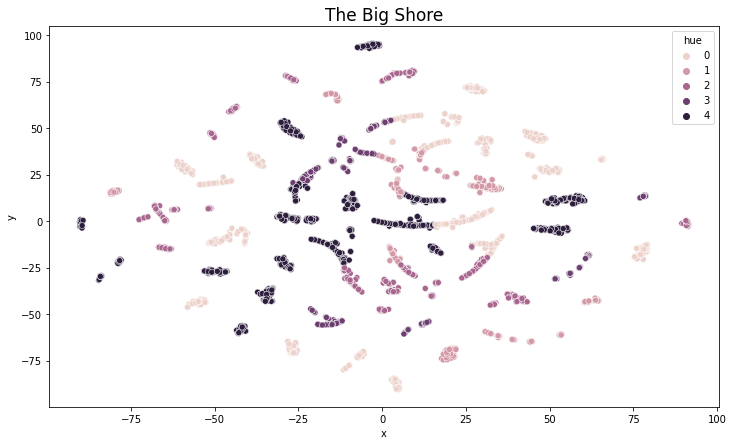

In [59]:
#scotter plot of reduced dimensionality for the movie The Big Short
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.title('The Big Shore', fontsize = 17)
plt.savefig('images/tsne_bigshort.jpg')

# Cloudy With a Chance of Meatballs

## LDA

In [60]:
#read in Cloudy with a Chance of Meatballs csv
CloudywithaChanceofMeatballs = pd.read_csv('CloudywithaChanceofMeatballs.csv')
CloudywithaChanceofMeatballs.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679


In [61]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in CloudywithaChanceofMeatballs['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [62]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [63]:
#adding to Cloudy With a Chance of Meatballs dataframe 

#lemmatized tweets list version
CloudywithaChanceofMeatballs['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in CloudywithaChanceofMeatballs['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

CloudywithaChanceofMeatballs['string_lemmatized'] = lemmatized_tweets_str_lst

CloudywithaChanceofMeatballs.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2010-09-16 19:54:13,Cloudy with a chance of meatballs :),en,[],TyraMyricks,https://twitter.com/TyraMyricks/status/2470891...,False,0,0,0,"{'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...",0.500,0.0,0.500,0.6124,"[cloudy, chance, meatball]",cloudy chance meatball
1,2010-09-16 19:35:21,@redshiftlove cloudy with a chance of meatball...,en,[],t8steve,https://twitter.com/t8steve/status/24707565423,False,0,0,0,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.247,0.0,0.753,0.3164,"[redshiftlove, cloudy, chance, meatball]",redshiftlove cloudy chance meatball
2,2010-09-16 17:27:08,I think it is officially time for me to addres...,en,[],JamesTheFourth,https://twitter.com/JamesTheFourth/status/2469...,False,0,0,0,"{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'comp...",0.087,0.0,0.913,0.2500,"[think, officially, time, address, whole, seen...",think officially time address whole seen cloud...
3,2010-09-16 17:18:49,I got Cloudy with a Chance of Meatballs on Blu...,en,[],beandog76,https://twitter.com/beandog76/status/24698154027,False,0,0,0,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.375,0.0,0.625,0.6588,"[cloudy, chance, meatball, blu, ray, woo]",cloudy chance meatball blu ray woo
4,2010-09-16 17:17:17,@Ollievoso like in Cloudy with a Chance of Mea...,en,[],Ferrisislove,https://twitter.com/Ferrisislove/status/246980...,False,0,0,0,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...",0.494,0.0,0.506,0.8679,"[ollievoso, like, cloudy, chance, meatball, wo...",ollievoso like cloudy chance meatball would aw...


In [64]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(CloudywithaChanceofMeatballs['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00p,00pm,01,02,03,037,039,040,...,zodiaclife,zombieland,zomg,zonarosa,zondara,zone,zooted,zpxdhxzw6g,zrim,zshnli5q
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(CloudywithaChanceofMeatballs['lemmatize'])

In [66]:
#bag of words
corpus = []
for tweet in CloudywithaChanceofMeatballs['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [67]:
#run LDA model on Cloudy with a Chance of Meatballs
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.091*"cloudy" + 0.090*"chance" + 0.089*"meatball" + 0.015*"watching" + 0.013*"bit" + 0.013*"movie" + 0.012*"3" + 0.010*"ray" + 0.010*"blu" + 0.009*"tonight"
Topic 1 
Words: 0.092*"chance" + 0.091*"meatball" + 0.091*"cloudy" + 0.012*"time" + 0.012*"ever" + 0.011*"first" + 0.009*"3d" + 0.009*"watchin" + 0.009*"nw" + 0.008*"watching"
Topic 2 
Words: 0.065*"cloudy" + 0.064*"chance" + 0.064*"meatball" + 0.017*"park" + 0.013*"bit" + 0.011*"xbox" + 0.010*"watch" + 0.010*"live" + 0.009*"watching" + 0.008*"movie"
Topic 3 
Words: 0.121*"cloudy" + 0.121*"meatball" + 0.120*"chance" + 0.034*"watching" + 0.031*"movie" + 0.012*"dvd" + 0.010*"watch" + 0.008*"p" + 0.007*"good" + 0.007*"night"
Topic 4 
Words: 0.099*"chance" + 0.099*"meatball" + 0.098*"cloudy" + 0.015*"watching" + 0.013*"movie" + 0.012*"great" + 0.011*"like" + 0.011*"bit" + 0.010*"lol" + 0.008*"disc"


In [68]:
#display LDA model on Cloudy with a Chance of Meatballs
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_cloudywithachanceofmeatballs.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.044921  0.035682       1        1  36.829439
0     -0.024286  0.111018       2        1  21.953565
4      0.090041 -0.039104       3        1  19.744644
1      0.027878 -0.061848       4        1  12.242326
2     -0.138554 -0.045747       5        1   9.230026, topic_info=         Term         Freq        Total Category  logprob  loglift
0      chance  4756.000000  4756.000000  Default  30.0000  30.0000
1      cloudy  4779.000000  4779.000000  Default  29.0000  29.0000
2    meatball  4755.000000  4755.000000  Default  28.0000  28.0000
183      park   175.000000   175.000000  Default  27.0000  27.0000
173     great   121.000000   121.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
19      movie    36.690777   841.252521   Topic5  -4.7792  -0.7497
233  forecast    16.390718    52.719306   Topic5  -5.5851   1.2144
165       one    18.708355   109.385458   Topic5  -5.4528   0.6168
387      free    15.115419   131.971687   Topic5  -5.6661   0.2158
229      good    13.437879   196.021405   Topic5  -5.7837  -0.2974

[322 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
746       2  0.972880              00
6260      1  0.956287             039
297       1  0.927515              18
297       2  0.040327              18
270       1  0.289807               2
...     ...       ...             ...
3901      5  0.891380  xxmasta0mindxx
170       5  0.967177           youtu
1434      2  0.124690         youtube
1434      5  0.810482         youtube
4101      4  0.785445         yyozf3y

[555 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

Topic 1 - cloudy, meatball, chance, watching, movie, dvd, watch, p, good, night, kid, nowwatching, e, inandout, time, lol, film, love, watched, uk, funny, family, import, cdr47644, hungry, 2009, cute, hilarious, really, parl

Topic 2 - cloudy, chance, meatball, watching, bit, movie, 3, ray, blu, tonight, new, free ,3d, fb, love, via, 5, park, post, see, outdoor, watch, amzn, game, dvd, tinyurl, star, miso, io, gomiso

Topic 3 - chance, meatball, cloudy, watching, movie, great, like, bit, lol, disc, edition, single, watched, anna, faris, bruce, campbell, deal, seen, bcsngl, love, steve, good, know, funny, awesome, cute, would, see, really

Topic 4 - chance, meatball, cloudy, time, ever, first, 3d, watchin, nw, watching, bluray, one, lol, watch, psp, go, funny, book, watched, good, day, bear, bit, sent, wish, gummy, haha, r, lovefilm, steve,

Topic 5 - cloudy, chance, meatball, park, bit, xbox, watch, live, watching, movie, playing, today, gonna, online, tonight, 2, currently, raptr, netflix, one, nation, 8, forecast, win, mr, free, good, festival, youtube, prince

## TSNE

In [69]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [70]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

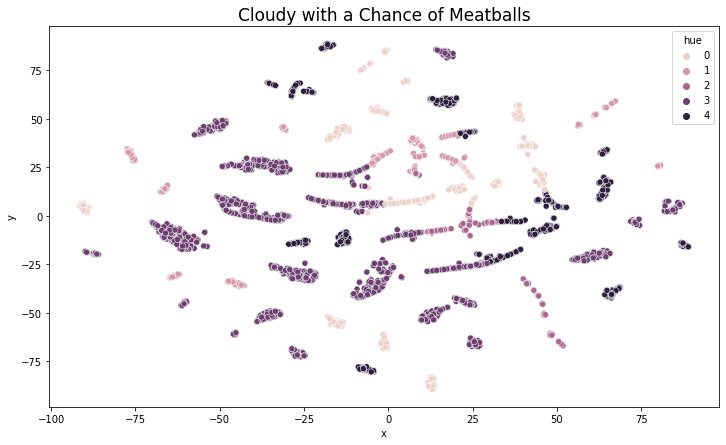

In [71]:
#scatter plot of reduced dimensionality for the movie Cloudy with a Chance of Meatballs
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.title('Cloudy with a Chance of Meatballs', fontsize = 17)
plt.savefig('images/tsne_cloudywithachanceofmeatballs.jpg')

# Wall-E

## LDA 

In [72]:
#read in Wall-E
WallE = pd.read_csv('Walle.csv')
WallE.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [73]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in WallE['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [74]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [75]:
#adding to Wall-E dataframe 

#lemmatized tweets list version
WallE['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in WallE['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

WallE['string_lemmatized'] = lemmatized_tweets_str_lst

WallE.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-06-25 19:37:09,Breaking News: Wall-E's battier has run out. H...,en,[],gawjr,https://twitter.com/gawjr/status/2335057043,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[breaking, news, wall, e, battier, run, found,...",breaking news wall e battier run found transpo...
1,2009-06-25 19:27:14,"I think my mind is too complex for WALL-E, @wu...",en,[],itsbrookekelly,https://twitter.com/itsbrookekelly/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[think, mind, complex, wall, e, wutendeskind]",think mind complex wall e wutendeskind
2,2009-06-25 19:22:26,Bout to watch Wall-e the best movie ever!!!!,en,[],IdntKnowat2put,https://twitter.com/IdntKnowat2put/status/2334...,False,0,0,0,"{'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'comp...",0.434,0.0,0.566,0.7482,"[bout, watch, wall, e, best, movie, ever]",bout watch wall e best movie ever
3,2009-06-25 19:20:48,Finally home full of micky d's n watchn wall-e,en,[],EliThunder85,https://twitter.com/EliThunder85/status/233474...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[finally, home, full, micky, n, watchn, wall, e]",finally home full micky n watchn wall e
4,2009-06-25 19:07:13,@erinichristine word to wall-e!,en,[],_paulstewart,https://twitter.com/_paulstewart/status/233449...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[erinichristine, word, wall, e]",erinichristine word wall e


In [76]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(WallE['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,002,00s,01709,0317,04,05,05fj,06,...,zomg,zone,zoo,zu1ol,zulky,zygbot,zzz,zzzz,zzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(WallE['lemmatize'])

In [78]:
#bag of words
corpus = []
for tweet in WallE['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [79]:
#running LDA Wall-E model
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.089*"e" + 0.088*"wall" + 0.028*"movie" + 0.018*"good" + 0.014*"pixar" + 0.009*"saw" + 0.008*"see" + 0.007*"watched" + 0.007*"cute" + 0.006*"love"
Topic 1 
Words: 0.089*"e" + 0.088*"wall" + 0.011*"bit" + 0.011*"time" + 0.008*"watch" + 0.008*"movie" + 0.008*"seen" + 0.007*"like" + 0.006*"story" + 0.006*"tinyurl"
Topic 2 
Words: 0.115*"wall" + 0.115*"e" + 0.080*"watching" + 0.015*"love" + 0.014*"movie" + 0.009*"time" + 0.008*"want" + 0.007*"watch" + 0.006*"day" + 0.005*"cute"
Topic 3 
Words: 0.077*"e" + 0.076*"wall" + 0.016*"like" + 0.009*"movie" + 0.008*"watching" + 0.006*"watch" + 0.006*"pixar" + 0.006*"eve" + 0.005*"best" + 0.005*"think"
Topic 4 
Words: 0.101*"wall" + 0.101*"e" + 0.019*"watching" + 0.009*"movie" + 0.009*"watch" + 0.005*"cute" + 0.005*"watchin" + 0.005*"love" + 0.004*"much" + 0.004*"better"


In [80]:
#display LDA Wall-E model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_walle.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.073188  0.042094       1        1  27.951820
0     -0.061707  0.031415       2        1  24.663123
4      0.053763 -0.012647       3        1  18.200762
3     -0.013057 -0.106593       4        1  15.061093
2      0.094190  0.045731       5        1  14.123203, topic_info=         Term         Freq        Total Category  logprob  loglift
12   watching   888.000000   888.000000  Default  30.0000  30.0000
11       wall  4761.000000  4761.000000  Default  29.0000  29.0000
3           e  4777.000000  4777.000000  Default  28.0000  28.0000
264      good   336.000000   336.000000  Default  27.0000  27.0000
97       like   299.000000   299.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
123      film    15.794450   141.262770   Topic5  -6.1318  -0.2336
352     today    13.918605    98.923966   Topic5  -6.2582  -0.0038
222     great    14.731108   161.344492   Topic5  -6.2015  -0.4362
17      think    14.220590   154.937864   Topic5  -6.2368  -0.4310
226        gt    12.908424    78.477533   Topic5  -6.3336   0.1524

[387 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1804      4  0.922284  1070291
43        1  0.537920        2
43        2  0.147375        2
43        3  0.058950        2
43        4  0.221063        2
...     ...       ...      ...
903       5  0.019267      yet
2377      1  0.239587       yo
2377      3  0.718762       yo
1442      2  0.070575       yr
1442      4  0.846905       yr

[757 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 4, 3])

Topic 1 - e, wall, bit, time, watch, movie, seen, like, story, tinyurl, robot, love, watched, make, toy, good, 2, nemo, best, first, pixar, great, last, night, go, transformer, saw, finding, film, gt

Topic 2 - e, wall, movie, good, pixar, saw, see, watched, cute, love, great, better, still, really, time, think, loved, thought, amazing, 3, bit, watching, watch, today, favorite, film, ever, night, even, robot

Topic 3 - wall, e, watching, movie, watch, cute, watchin, love, much, better, see, kid, short, day, bit, still, im, hello, dolly, new, made, tinurl, sunday, circuit, put, robot, 5, lol, clothes, sound

Topic 4 - e, wall, like, movie, watching, watch, pixar, eve, best, think, need, im, 2, lol, look, one, still, watched, film, love, ever, sleep, disney, good, tinyurl, time, soundtrack, awesome, haha, ray

Topic 5 - wall, e, watching, love, movie, time, want, watch, day, cute, finished, one, watched, lol, first, 3, finally, would, like, twitpic, people, eating, film, home, xd, great, new, think, today, gt

## TSNE 

In [81]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [82]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

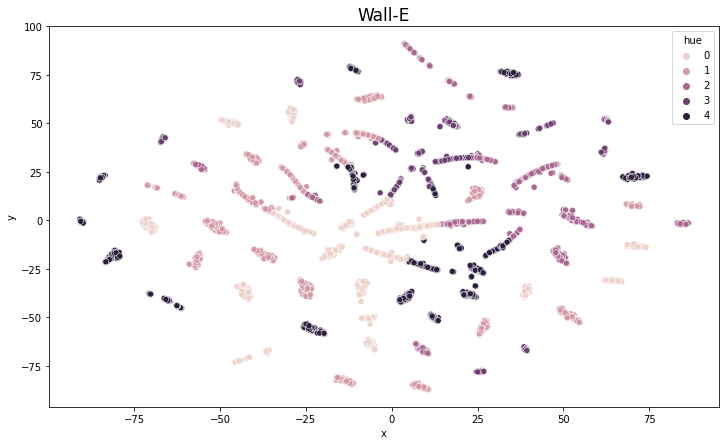

In [83]:
#Wall-E reduced dimensionality T-SNE scatter plot
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding)
plt.title('Wall-E', fontsize = 17)
plt.savefig('images/tsne_walle.jpg')

# Slumdog Millionaire

## LDA 

In [84]:
#read in Slumdog Millionaire csv
SlumdogMillionaire = pd.read_csv('SlumdogMillionaire.csv')
SlumdogMillionaire.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000


In [85]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SlumdogMillionaire['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [86]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [87]:
#adding to Slumdog Millionaire dataframe 

#lemmatized tweets list version
SlumdogMillionaire['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SlumdogMillionaire['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SlumdogMillionaire['string_lemmatized'] = lemmatized_tweets_str_lst

SlumdogMillionaire.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2009-11-10 18:29:55,@krael52 because shravani and keethi want to p...,en,[],GregoryRael,https://twitter.com/GregoryRael/status/5603007478,False,0,0,0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.166,0.0,0.834,0.4574,"[krael52, shravani, keethi, want, play, wanty,...",krael52 shravani keethi want play wanty beat b...
1,2009-11-10 17:56:36,Outside with sam jefferson and my big sis... c...,en,[],Desha_c16,https://twitter.com/Desha_c16/status/5602137272,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[outside, sam, jefferson, big, si, chillin, po...",outside sam jefferson big si chillin porch bou...
2,2009-11-10 17:29:05,@1heavenlyflower: OMG! my favorite movie.........,en,[],TrinaChavez,https://twitter.com/TrinaChavez/status/5601420853,False,0,0,0,"{'neg': 0.0, 'neu': 0.59, 'pos': 0.41, 'compou...",0.410,0.0,0.590,0.6331,"[1heavenlyflower, omg, favorite, movie, slumdo...",1heavenlyflower omg favorite movie slumdog mil...
3,2009-11-10 17:20:07,"Crapola News!, Slumdog Millionaire grabs 5 nod...",en,[],DailyNewsBuzz,https://twitter.com/DailyNewsBuzz/status/56011...,False,0,0,0,"{'neg': 0.0, 'neu': 0.785, 'pos': 0.215, 'comp...",0.215,0.0,0.785,0.5093,"[crapola, news, slumdog, millionaire, grab, 5,...",crapola news slumdog millionaire grab 5 nod eu...
4,2009-11-10 17:13:39,Standing in line with @lparaggio to get her vi...,en,[],isaiahheaden,https://twitter.com/isaiahheaden/status/560102...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.0,1.000,0.0000,"[standing, line, lparaggio, visa, slumdog, mil...",standing line lparaggio visa slumdog millionai...


In [88]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SlumdogMillionaire['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,039,04am,05,057allowances,06,07,08,085,...,zoo,zu4ak,zuko,zukoso,zumg,zvydy,zxsfj,zzzs,zzzz,zzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
##dictionary of numbers to words
dictionary = corpora.Dictionary(SlumdogMillionaire['lemmatize'])

In [90]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in SlumdogMillionaire['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [91]:
#running LDA model on Slumdog Millionaire
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.061*"slumdog" + 0.060*"millionaire" + 0.050*"bit" + 0.045*"school" + 0.039*"new" + 0.033*"lie" + 0.032*"marketing" + 0.032*"klaver" + 0.032*"kim" + 0.018*"kid"
Topic 1 
Words: 0.044*"slumdog" + 0.044*"millionaire" + 0.017*"pinto" + 0.016*"bit" + 0.014*"freida" + 0.010*"dev" + 0.009*"patel" + 0.008*"ho" + 0.008*"check" + 0.008*"jai"
Topic 2 
Words: 0.119*"millionaire" + 0.119*"slumdog" + 0.043*"watching" + 0.041*"movie" + 0.017*"good" + 0.013*"time" + 0.012*"watched" + 0.010*"great" + 0.008*"love" + 0.008*"finally"
Topic 3 
Words: 0.082*"slumdog" + 0.080*"millionaire" + 0.021*"movie" + 0.019*"bit" + 0.018*"watch" + 0.010*"lol" + 0.009*"boyle" + 0.008*"kid" + 0.008*"see" + 0.007*"love"
Topic 4 
Words: 0.076*"slumdog" + 0.065*"millionaire" + 0.024*"bit" + 0.021*"kid" + 0.016*"child" + 0.015*"star" + 0.015*"trust" + 0.015*"loo" + 0.014*"fund" + 0.010*"ap"


In [92]:
#display Slumdog Millionaire LDA model
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_slumdogmillionaire.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.156010  0.019743       1        1  45.952607
3     -0.074063  0.037899       2        1  21.676054
4      0.049073 -0.169393       3        1  15.141166
0      0.174788  0.080116       4        1  10.399406
1      0.006211  0.031636       5        1   6.830767, topic_info=           Term         Freq        Total Category  logprob  loglift
48     watching  1005.000000  1005.000000  Default  30.0000  30.0000
61          bit   755.000000   755.000000  Default  29.0000  29.0000
1630     school   261.000000   261.000000  Default  28.0000  28.0000
575         new   229.000000   229.000000  Default  27.0000  27.0000
2733        lie   173.000000   173.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
92    bollywood    11.106245    37.933277   Topic5  -5.7260   1.4554
2156        lil     9.937725    31.422159   Topic5  -5.8372   1.5326
21        watch    19.866952   382.243377   Topic5  -5.1445  -0.2733
1089       star    14.751775   201.596388   Topic5  -5.4422   0.0688
313         yes    10.591925    50.344384   Topic5  -5.7734   1.1249

[301 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
369       2  0.960204       127
369       5  0.041748       127
811       5  0.938460    153oak
676       2  0.973699    19z1vn
4400      3  0.933336    1givy6
...     ...       ...       ...
2759      4  0.940196   yhfzf2x
1611      1  0.040216        yo
1611      2  0.924959        yo
2167      2  0.875526  youngest
948       4  0.939534   youtube

[576 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

Topic 1 - millionaire, slumdog, watching, movie, good, time, watched, great, love, finally, watchin, first, saw, watch, one, seen, like, best, really, hbo, finished, night, film, lol, know, last, see, late, end, ever

Topic 2 - slumdog, millionaire, movie, bit, watch, lol, boyle, kid, see, love, good, slumdogmillionaire, director, danny, film, like, 39, story, fame, spoiled, time, gt, 2, shit, jamal, freida, seen, award, going, im

Topic 3 - slumdog, millionaire, bit, kid, child, star, trust, loo, fund, ap, lauper, two, gd, truancy, aka, feat, threatens, 4mjhh, project, wyclef, cindy, manison, hut, sad, luscious, 39, risk, watch, lose, movie

Topic 4 - slumdog, millionaire, bit, school, new, lie, marketing, klaver, kim, kid, fame, spiled, live, like, maybe, slumdogmillionaire, vicariously, 3uihwr, tinyurl, lose, attendance, star, report, fails, emerge, digg, could, may, yh7m2a9, post

Topic 5 - slumdog, millionaire, pinto, bit, freida, dev, patel, ho, check, jai, r, twitpic, mr, imposs, rahman, haitian, wyclef, watch, song, 3, star, 153oak, joint, bye, hi, bollywood, o6ae1, frieda, london, yes

## TSNE 

In [93]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [94]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

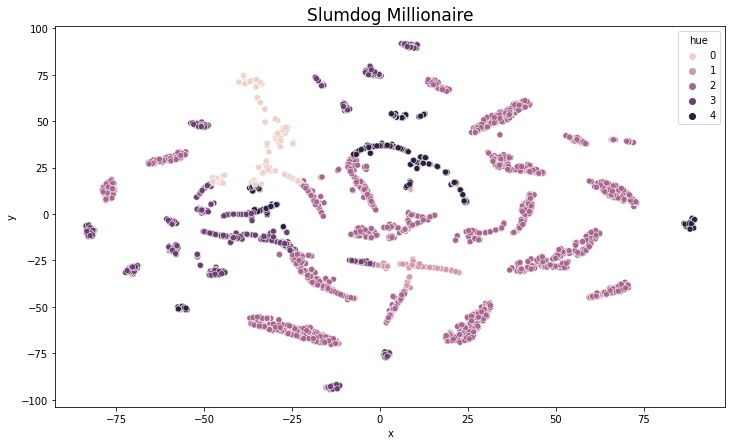

In [95]:
#plot tsne
fig, ax = plt.subplots(figsize=(12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    data=embedding,
    ax=ax)
plt.title('Slumdog Millionaire', fontsize = 17)
plt.savefig('images/tsne_slumdogmillionaire.jpg')

# Bird Box

## LDA 

In [22]:
#read in Bird Box csv
BirdBox = pd.read_csv('BirdBox.csv')
BirdBox.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313


In [23]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in BirdBox['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [26]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [27]:
#adding to Bird Box dataframe 

#lemmatized tweets list version
BirdBox['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in BirdBox['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

BirdBox['string_lemmatized'] = lemmatized_tweets_str_lst

BirdBox.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2019-12-12 18:55:11,Lil Natty &amp; Thunda ft. Travis World &amp; ...,en,"['caribbeansessions', 'pressplay']",CaribSessions,https://twitter.com/CaribSessions/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.938, 'pos': 0.062, 'comp...",0.062,0.000,0.938,0.2023,"[lil, natty, thunda, ft, travis, world, julius...",lil natty thunda ft travis world julius czar g...
1,2019-12-12 18:48:41,I also stopped and ended up buying the Angry B...,en,[],nerdboner,https://twitter.com/nerdboner/status/120527329...,False,1,0,0,"{'neg': 0.242, 'neu': 0.522, 'pos': 0.236, 'co...",0.236,0.242,0.522,-0.0587,"[also, stopped, ended, buying, angry, bird, st...",also stopped ended buying angry bird star war ...
2,2019-12-12 18:37:12,I know I'm doing really well but part of me ju...,en,[],Antalya_Bird,https://twitter.com/Antalya_Bird/status/120527...,False,1,0,0,"{'neg': 0.0, 'neu': 0.922, 'pos': 0.078, 'comp...",0.078,0.000,0.922,0.1770,"[know, really, well, part, really, want, eat, ...",know really well part really want eat whole bo...
3,2019-12-12 18:35:24,K News - Olympia underground record label Fair...,en,[],K_recs,https://twitter.com/K_recs/status/120526995400...,False,1,0,1,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp...",0.082,0.000,0.918,0.3802,"[k, news, olympia, underground, record, label,...",k news olympia underground record label fair b...
4,2019-12-12 18:34:14,@RuthsBestBoy I'd like to commission an all-ye...,en,[],DanaGavin1895,https://twitter.com/DanaGavin1895/status/12052...,False,0,0,0,"{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'comp...",0.233,0.000,0.767,0.9313,"[ruthsbestboy, like, commission, year, round, ...",ruthsbestboy like commission year round box sa...


In [28]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(BirdBox['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00012,009,00pm,00usdvrf2u,01,01293,01298,01664,...,zwsoh1p0ce,zwu5qdtzbv,zxqpyu0d8g,zxsrswu7qq,zygoluiruc,zyp551lsw9,zzibaim,zzn31fssl2,zzrfvlibi2,zztrlcq1nz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(BirdBox['lemmatize'])

In [30]:
#bag of words
corpus = []
for tweet in BirdBox['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [31]:
#running Bird Box LDA model 
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.036*"bird" + 0.036*"box" + 0.020*"birdbox" + 0.016*"watch" + 0.010*"year" + 0.008*"movie" + 0.007*"gift" + 0.007*"netflix" + 0.007*"wooden" + 0.007*"like"
Topic 1 
Words: 0.057*"box" + 0.054*"bird" + 0.021*"birdbox" + 0.009*"like" + 0.008*"movie" + 0.008*"moviemenfess" + 0.005*"bad" + 0.005*"train" + 0.004*"busan" + 0.004*"star"
Topic 2 
Words: 0.070*"bird" + 0.070*"box" + 0.008*"soca" + 0.007*"watching" + 0.007*"birdbox" + 0.006*"playing" + 0.006*"like" + 0.005*"2019" + 0.005*"julius" + 0.005*"world"
Topic 3 
Words: 0.052*"box" + 0.051*"bird" + 0.012*"birdbox" + 0.006*"like" + 0.006*"one" + 0.004*"day" + 0.003*"netflix" + 0.003*"irishman" + 0.003*"via" + 0.003*"also"
Topic 4 
Words: 0.053*"news" + 0.034*"bird" + 0.033*"box" + 0.030*"today" + 0.028*"usa" + 0.016*"netflix" + 0.016*"last" + 0.016*"amazon" + 0.015*"google" + 0.015*"credit"


In [32]:
#displaying Bird Box LDA modelb
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_birdbox.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.220445  0.005677       1        1  26.403941
1      0.066535 -0.027173       2        1  23.018430
3      0.051024 -0.009565       3        1  18.497844
0      0.042492 -0.093381       4        1  17.832855
2      0.060394  0.124441       5        1  14.246930, topic_info=           Term         Freq        Total Category  logprob  loglift
60         news  1062.000000  1062.000000  Default  30.0000  30.0000
1168        usa   570.000000   570.000000  Default  29.0000  29.0000
152       today   599.000000   599.000000  Default  28.0000  28.0000
1151     amazon   313.000000   313.000000  Default  27.0000  27.0000
1152     credit   303.000000   303.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
112         see    39.207740   169.468348   Topic5  -5.6109   0.4848
153     birdbox    72.814608   958.748197   Topic5  -4.9919  -0.6291
85         time    28.521612   157.873756   Topic5  -5.9291   0.2375
422   challenge    23.873208    88.160459   Topic5  -6.1070   0.6422
241        even    22.763850    73.796359   Topic5  -6.1546   0.7725

[323 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
10091      1  0.931530    020
491        1  0.219115      1
491        2  0.301284      1
491        3  0.237375      1
491        4  0.200856      1
...      ...       ...    ...
89         2  0.178143   year
89         3  0.057635   year
89         4  0.681135   year
89         5  0.026198   year
5231       4  0.945865  zebra

[667 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 1, 3])

From the LDA model ...

Topic 1 (news on birdbox)- news, bird, box, today, usa, netflix, las, amazon, google, credit, health, karma, survival, quote, inssurance (with two s's), mesothelioma, trump, rate, latesntnews, fox, feautre, newstoday, community, nyt, gt, birdbox, world, usatoday, say, see

Topic 2 - box, bird, birdbox, like, movie, moviemenfess, bad, train, busan, star, squaman, dilan, alongside, day, aladdin, genius, see, still, people, 8, thing, make, think, book, would, via, on, christmas, gift, love

Topic 3 - box, bird, birdbox, like, one, day, netflix, irishman, via, also, early, 2, put , boy, people, girl, music, watch, 10, check, film, know, 1, go, el, time, look, good, ebay, 5

Topic 4 - bird, box, birdbox, watch, year, movie, gift, netflix, wooden, like, bobo, wood, time, film, via, men, love, new, 2, christmas, last, woman, first, irishman, watched, quartz, 3, vintage, brand, pretty

Topic 5 - bird, box, soca, watching, birdbox, playing, like, 2019, julius, world, czar, travis, 24, 7, ft, riddim, iduenwo09wh,
caribbeansessions, pressplay, o1dmha3nlh, scary, see, blog, go , time, modo, fabulous, challenge, skinny, even

Topic 1 is news related. By looking through the tweets other topics in the news at the time were inssurance quotes and Trump. There is mention of Christmas in topic 2. These must be because Bird Box was released a couple weeks before Christmas. Moviemenfess is a twitter account and Train to Busan, Dilan, and Aladdin are other movies. Therefore topic two must be related to movies and the holidays. Topic 3 encompasses the Irishman, another movie. Topic three seems to be about the movie Bird Box itself because boy and girl refer to two of the characters. Topic three also got crossed with anything selling on eBay with the tweets bird and box in them. Topic 4 seems similiar to topic 3. Bobo bird is a type of watch. I imagine it can be purchased online. Christmas is mentioned again so the topic might relate to Christmas presents. Topic 5 is about the song Bird Box by Skinny Fabulous ft. Travis world and Julius Czar. I did not know this song existed when choosing this movie. 

## TSNE 

In [163]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [164]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

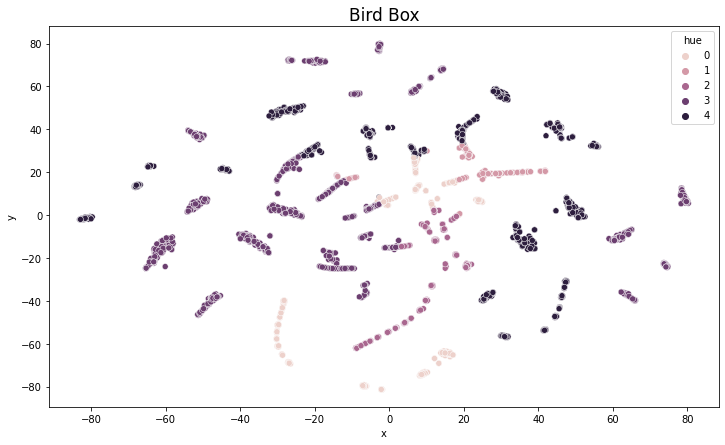

In [165]:
#t-sne plot
fig, ax = plt.subplots(figsize=(12, 7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax=ax,
    data=embedding)
plt.title('Bird Box', fontsize = 17)
plt.savefig('images/tsne_birdbox.jpg')

# Silver Linings Playbook

## LDA 

In [105]:
#read in Silver Linings Playbook csv
SilverLiningsPlaybook = pd.read_csv('SilverLiningsPlaybook.csv')
SilverLiningsPlaybook.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-11-14 18:47:39,I got silver linings playbook so basically im ...,en,[],sassy_pizza,https://twitter.com/sassy_pizza/status/4011343...,False,0,0,0,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.272,0.000,0.728,0.6249
1,2013-11-14 18:37:55,And if I were to write a book right now my ope...,en,[],liammiller87,https://twitter.com/liammiller87/status/401131...,False,0,1,0,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.000,0.149,0.851,-0.6759
2,2013-11-14 18:34:28,Finally watching #silverliningsplaybook,en,['silverliningsplaybook'],CuteStalkerChic,https://twitter.com/CuteStalkerChic/status/401...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
3,2013-11-14 18:21:20,Silver linings playbook: Four good things abou...,en,[],PNCAU,https://twitter.com/PNCAU/status/4011277414512...,False,0,0,0,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.195,0.000,0.805,0.4404
4,2013-11-14 18:07:35,Silver Linings Playbook gets a solid 8 out of 10.,en,[],derekgoulding,https://twitter.com/derekgoulding/status/40112...,False,0,0,0,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.151,0.000,0.849,0.1531


In [106]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in SilverLiningsPlaybook['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [107]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [108]:
#adding to Silver Linings Playbook dataframe 

#lemmatized tweets list version
SilverLiningsPlaybook['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in SilverLiningsPlaybook['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

SilverLiningsPlaybook['string_lemmatized'] = lemmatized_tweets_str_lst

SilverLiningsPlaybook.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2013-11-14 18:47:39,I got silver linings playbook so basically im ...,en,[],sassy_pizza,https://twitter.com/sassy_pizza/status/4011343...,False,0,0,0,"{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp...",0.272,0.000,0.728,0.6249,"[silver, lining, playbook, basically, im, awes...",silver lining playbook basically im awesome day
1,2013-11-14 18:37:55,And if I were to write a book right now my ope...,en,[],liammiller87,https://twitter.com/liammiller87/status/401131...,False,0,1,0,"{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'comp...",0.000,0.149,0.851,-0.6759,"[write, book, right, opening, quote, would, no...",write book right opening quote would nothing l...
2,2013-11-14 18:34:28,Finally watching #silverliningsplaybook,en,['silverliningsplaybook'],CuteStalkerChic,https://twitter.com/CuteStalkerChic/status/401...,False,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[finally, watching, silverliningsplaybook]",finally watching silverliningsplaybook
3,2013-11-14 18:21:20,Silver linings playbook: Four good things abou...,en,[],PNCAU,https://twitter.com/PNCAU/status/4011277414512...,False,0,0,0,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.195,0.000,0.805,0.4404,"[silver, lining, playbook, four, good, thing, ...",silver lining playbook four good thing electio...
4,2013-11-14 18:07:35,Silver Linings Playbook gets a solid 8 out of 10.,en,[],derekgoulding,https://twitter.com/derekgoulding/status/40112...,False,0,0,0,"{'neg': 0.0, 'neu': 0.849, 'pos': 0.151, 'comp...",0.151,0.000,0.849,0.1531,"[silver, lining, playbook, get, solid, 8, 10]",silver lining playbook get solid 8 10


In [109]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(SilverLiningsPlaybook['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,01,02,03,05,05nwmebdx3,06,09,0amtcufvwj,0bluywnrm0,...,zqu6exfxm6,zrg6jcg6z2,zsi9szgv1t,zxhoq5ox0g,zxx8x83hor,zyjofpstxo,zz5farhu6e,zza,zzazhfodms,zzmd26sk0g
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(SilverLiningsPlaybook['lemmatize'])

In [111]:
#bag of words
corpus = []
for tweet in SilverLiningsPlaybook['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [112]:
#run LDA model on Silver Linings Playbook
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.054*"lining" + 0.054*"silver" + 0.053*"playbook" + 0.038*"gt" + 0.015*"silverliningsplaybook" + 0.012*"time" + 0.009*"cooper" + 0.009*"bradley" + 0.008*"good" + 0.007*"movie"
Topic 1 
Words: 0.134*"silver" + 0.134*"lining" + 0.133*"playbook" + 0.025*"watching" + 0.014*"movie" + 0.014*"good" + 0.012*"watch" + 0.007*"film" + 0.007*"time" + 0.006*"love"
Topic 2 
Words: 0.057*"silver" + 0.057*"lining" + 0.057*"playbook" + 0.026*"silverliningsplaybook" + 0.023*"movie" + 0.017*"love" + 0.013*"favorite" + 0.011*"one" + 0.010*"lawrence" + 0.010*"jennifer"
Topic 3 
Words: 0.014*"silverliningsplaybook" + 0.006*"opened" + 0.006*"judged" + 0.003*"art" + 0.003*"hemingway" + 0.003*"u" + 0.003*"snug" + 0.003*"apologize" + 0.003*"ernest" + 0.003*"like"
Topic 4 
Words: 0.092*"silver" + 0.092*"lining" + 0.092*"playbook" + 0.021*"movie" + 0.014*"film" + 0.012*"lawrence" + 0.011*"jennifer" + 0.011*"great" + 0.010*"silverliningsplaybook" + 0.008*"watched"


In [113]:
#Display LDA model on Silver Linings Playbook
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_silverliningsplaybook.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.121914  0.032480       1        1  43.428669
4     -0.092821 -0.023852       2        1  26.974581
2     -0.033208 -0.097054       3        1  15.698580
0      0.027619  0.108764       4        1  10.891593
3      0.220323 -0.020339       5        1   3.006578, topic_info=                      Term        Freq       Total Category  logprob  loglift
334                     gt  183.000000  183.000000  Default  30.0000  30.0000
18   silverliningsplaybook  425.000000  425.000000  Default  29.0000  29.0000
9                     love  274.000000  274.000000  Default  28.0000  28.0000
19                watching  542.000000  542.000000  Default  27.0000  27.0000
363               favorite  120.000000  120.000000  Default  26.0000  26.0000
..                     ...         ...         ...      ...      ...      ...
375                someone    3.326426   25.312153   Topic5  -5.9605   1.4750
322                   year    3.183961   31.492274   Topic5  -6.0042   1.2128
122                  happy    2.768235   36.553102   Topic5  -6.1441   0.9238
60                    like    3.474067  191.033007   Topic5  -5.9170  -0.5028
366                tiffany    2.346964   36.655971   Topic5  -6.3092   0.7559

[328 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2522      1  0.873314   106
199       1  0.056035     2
199       2  0.186782     2
199       3  0.597702     2
199       4  0.168104     2
...     ...       ...   ...
322       2  0.317538  year
322       3  0.254031  year
322       4  0.063508  year
322       5  0.095261  year
1284      3  0.931538  zero

[540 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

Topic 1 - silver, lining, playbook, watching, movie, good, watch, film, time, love, like, 3, book, nw, watched, really, seen, much, read, first, feel, silverliningsplaybook, make, gonna, quick, awesome, cooper, matthew, breadley, finished

Topic 2 - silver, lining, playbook, movie, film, lawrence, jennifer, great, silverliningsplaybook, watched, fimally, cooper, best, bradley, one, watch, watching, amazing, 2012, night, see, seen, ever, love, good, like, loved, photoset, life, actress

Topic 3 - silver, playbook, lining, silverliningsplaybook, movie, love, favorite, one, lawrence, jennifer, watch, best, watched, crazy, like, tonight, de, day, ever, 2, new, think, 5, niro, bradley, time, review, part, cooper, always

Topic 4 - lining, silver, playbook, gt, silverliningsplaybook, time, cooper, bradley, good, movie, watched, family, watch, showing, really, service, bethesda, visited, private, provide, naval, f5zhz7deco, think, week, today, film, page, last, want, night

Topic 5 - silverliningsplaybook, opened, judged, art, hemingway, u, snug, apologize, ernest, like, someone, year, harbor, celebrates, noble, anniversary, auction, island, 25th, staten, maritime, blame, behalf, happy, tiffany, harry, potter, juno, kher, course

## TSNE

In [114]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [115]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

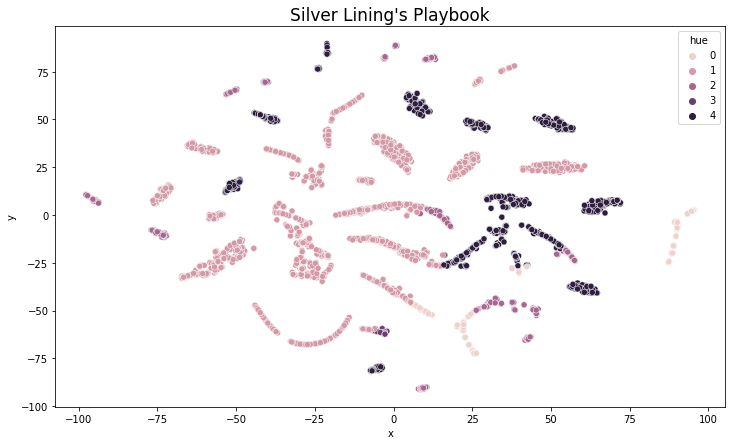

In [116]:
#scatter plot of reduced dimensionality for the movie Silver Lining's Playbook
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title("Silver Lining's Playbook", fontsize = 17)
plt.savefig('images/tsne_silverliningsplaybook.jpg')

# Django Unchained

## LDA 

In [117]:
#read in Django Unchained csv
DjangoUnchained = pd.read_csv('DjangoUnchained.csv')
DjangoUnchained.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124


In [118]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in DjangoUnchained['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [119]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [120]:
#adding to Django Unchained dataframe 

#lemmatized tweets list version
DjangoUnchained['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in DjangoUnchained['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

DjangoUnchained['string_lemmatized'] = lemmatized_tweets_str_lst

DjangoUnchained.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2013-12-23 18:44:22,Django Unchained is brilliant #topfilm,en,['topfilm'],Jacobbck_,https://twitter.com/Jacobbck_/status/415266664...,False,2,0,0,"{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'comp...",0.487,0.000,0.513,0.5859,"[django, unchained, brilliant, topfilm]",django unchained brilliant topfilm
1,2013-12-23 18:31:11,Every 10 seconds in Django Unchained you hear ...,en,[],Umaarrr_,https://twitter.com/Umaarrr_/status/4152633444...,False,0,0,0,"{'neg': 0.301, 'neu': 0.699, 'pos': 0.0, 'comp...",0.000,0.301,0.699,-0.6486,"[every, 10, second, django, unchained, hear, w...",every 10 second django unchained hear word nigger
2,2013-12-23 18:26:03,Cause I will be a problem. I’m talking Django ...,en,[],DeShayFromVA,https://twitter.com/DeShayFromVA/status/415262...,False,0,0,0,"{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'comp...",0.000,0.231,0.769,-0.4019,"[cause, problem, talking, django, unchained]",cause problem talking django unchained
3,2013-12-23 18:16:54,White house down... Man of steel... Monsters U...,en,[],Mystic_Sk,https://twitter.com/Mystic_Sk/status/415259749...,False,0,2,0,"{'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'comp...",0.000,0.177,0.823,-0.4767,"[white, house, man, steel, monster, university...",white house man steel monster university lone ...
4,2013-12-23 18:15:53,on a movie scale of 'm night shamalyans the vi...,en,[],dboyyfresh,https://twitter.com/dboyyfresh/status/41525949...,False,1,0,0,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",0.000,0.167,0.833,-0.6124,"[movie, scale, night, shamalyans, village, dja...",movie scale night shamalyans village django un...


In [121]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(DjangoUnchained['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00pm,02,04kov4vvzo,05,06,06troop21,07mwjfqial,08,...,zwlwqncs9i,zwnsrvu2sj,zx77nzpcsi,zx9y3vegjs,zxxgwmoq1t,zybpmuiu0h,zzdecom3wz,zzdu49y8g7,zzk2ayss92,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(DjangoUnchained['lemmatize'])

In [123]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in DjangoUnchained['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [124]:
#running LDA model for Django Unchained
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.066*"django" + 0.065*"unchained" + 0.009*"10" + 0.009*"leonardo" + 0.007*"dicaprio" + 0.007*"movie" + 0.007*"watching" + 0.006*"like" + 0.006*"watch" + 0.006*"2012"
Topic 1 
Words: 0.094*"django" + 0.090*"unchained" + 0.041*"movie" + 0.014*"time" + 0.010*"youtube" + 0.009*"watch" + 0.009*"soundtrack" + 0.009*"video" + 0.007*"djangounchained" + 0.007*"hd"
Topic 2 
Words: 0.069*"django" + 0.069*"unchained" + 0.021*"djangounchained" + 0.012*"ray" + 0.012*"blu" + 0.011*"film" + 0.010*"copy" + 0.010*"dvd" + 0.008*"ultraviolet" + 0.008*"good"
Topic 3 
Words: 0.108*"django" + 0.106*"unchained" + 0.017*"film" + 0.015*"movie" + 0.010*"like" + 0.009*"watch" + 0.008*"watched" + 0.008*"best" + 0.008*"tarantino" + 0.008*"year"
Topic 4 
Words: 0.090*"django" + 0.088*"unchained" + 0.031*"watching" + 0.016*"nigga" + 0.014*"djangounchained" + 0.013*"3" + 0.011*"film" + 0.010*"movie" + 0.008*"time" + 0.007*"2"


In [125]:
#display LDA model for Django Unchained
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_djangounchained.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.053808 -0.046480       1        1  32.665806
4     -0.017754  0.052239       2        1  23.819687
1     -0.091862 -0.044418       3        1  17.143253
2      0.129061 -0.073732       4        1  16.997913
0      0.034363  0.112391       5        1   9.373342, topic_info=                Term        Freq       Total Category  logprob  loglift
65             nigga  170.000000  170.000000  Default  30.0000  30.0000
29             movie  695.000000  695.000000  Default  29.0000  29.0000
90          watching  464.000000  464.000000  Default  28.0000  28.0000
63   djangounchained  375.000000  375.000000  Default  27.0000  27.0000
70                 3  147.000000  147.000000  Default  26.0000  26.0000
..               ...         ...         ...      ...      ...      ...
29             movie   28.228642  695.285833   Topic5  -4.9776  -0.8367
63   djangounchained   16.521377  375.163162   Topic5  -5.5133  -0.7554
44              film   13.580108  464.499065   Topic5  -5.7093  -1.1651
62        soundtrack   12.041958  175.942858   Topic5  -5.8295  -0.3145
700             last   10.738259  103.068038   Topic5  -5.9441   0.1057

[347 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
68        1  0.232014           1
68        2  0.655693           1
68        3  0.010088           1
68        4  0.100876           1
68        5  0.010088           1
...     ...       ...         ...
1055      4  0.194235        zero
1055      5  0.712195        zero
1572      4  0.176132  zo8k55udc7
1572      5  0.880660  zo8k55udc7
1592      5  0.882148  zul9gldp8p

[662 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

Topic 1 - django, unchained, film, movie, like, watch, watched, best, tarantino, year, good, seen, great, ever, gt, slave, 12, quentin, freedom, time, one, really, youtube, jackson, love, last, man, n, soundtrack, word

Topic 2 - django, unchained, watching, n word, djangounchained, 3, film, movie, time, 2, tarantino, top, 1, one, 2013, finally, quentin, 5, watch, first, year, soundtrack, end, 4, gravity, great, love, best, gonna, say

Topic 3 -django, unchained, movie, time, youtube, watch, soundtrack, video, djangounchained, hd, review, think, one, thought, favorite, good, new, best, thehopedealer, bloglife, edi, first, john, amazing, via, legend, si0oytypo3, year, watching, fedora

Topic 4 - django, unchained, djangounchained, ray, blu, film, copy, dvd, ultraviolet, good, like, watching, digital, best, way, 99, 10, movie, 5, 2013, light, boy, used, die, bluray, deal, giant, moonlight, create, tarantino

Topic 5 - django, unchained, 10, leonardo, dicaprio, movie, watching, like, watch, 2012, waltz, christoph, curiosity, everyone, next, djangounchained, attention, film, congrats, gentleman, soundtrack, oscar, 9, iamjamiefoxx, zero, last, nod, di, grammy, god

## TSNE 

In [126]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])
        
# X

In [127]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

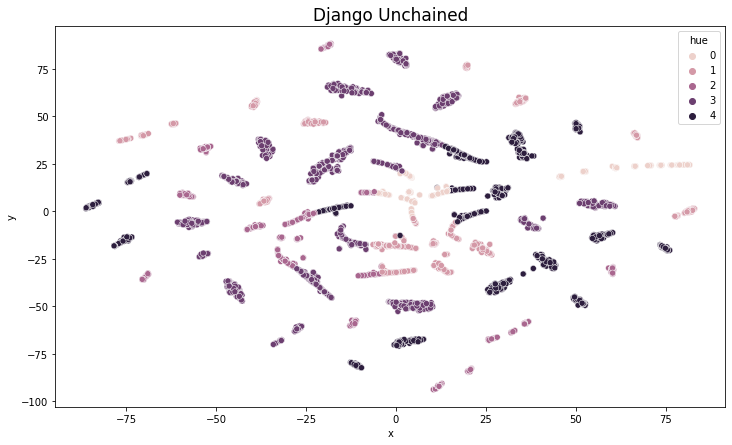

In [128]:
#tsne scatterplot for Django Unchained
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Django Unchained', fontsize = 17)
plt.savefig('images/tsne_djangounchained.jpg')

# Hocus Pocus

## LDA 

In [33]:
#read in Hocus Pocus csv
HocusPocus = pd.read_csv('HocusPocus.csv')
HocusPocus.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)
HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000


In [34]:
#tokenizing each tweet
tokenized_tweets = []
for tweet in HocusPocus['tweet']:
    tokenized_tweets.append(tokenizer.tokenize(tweet.lower())) #making all tweets lowercase so no word is duplicated later on
# tokenized_tweets

In [35]:
#lemmatize tweets
lemmatized_tweets=[]
for tweet in tokenized_tweets:
    lemmatized_words = []
    for word in tweet:
        if word not in stopwords_list:
            lemmatized_words.append(lemmatizer.lemmatize(word))
    lemmatized_tweets.append(lemmatized_words)

# lemmatized_tweets

In [36]:
#adding to Hocus Pocus dataframe 

#lemmatized tweets list version
HocusPocus['lemmatize'] = lemmatized_tweets

#string version
lemmatized_tweets_str_lst = []
for tweet in HocusPocus['lemmatize'].tolist():
    lemmatized_tweets_str_lst.append(" ".join(tweet))

HocusPocus['string_lemmatized'] = lemmatized_tweets_str_lst

HocusPocus.head()

,date,tweet,language,hashtags,username,link,retweet,nlikes,nreplies,nretweets,vader_score,positive sentiment score,negative sentiment score,neutral sentiment score,compound sentiment score,lemmatize,string_lemmatized
0,2015-09-29 19:57:07,"@WarlockTriqz Hocus Pocus, Halloween Town, Nig...",en,[],veroicone,https://twitter.com/veroicone/status/649010043...,False,0,1,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[warlocktriqz, hocus, pocus, halloween, town, ...",warlocktriqz hocus pocus halloween town nightm...
1,2015-09-29 19:53:43,hocus pocus and chill fall edition lmao #justk...,en,"['justkidding', 'idonthavefriends']",lyaanneeee,https://twitter.com/lyaanneeee/status/64900918...,False,0,0,0,"{'neg': 0.0, 'neu': 0.672, 'pos': 0.328, 'comp...",0.328,0.000,0.672,0.5994,"[hocus, pocus, chill, fall, edition, lmao, jus...",hocus pocus chill fall edition lmao justkiddin...
2,2015-09-29 19:52:13,I tried REAAALLLLYYYY hard not to watch it bef...,en,['hocuspocus'],BryceFSU,https://twitter.com/BryceFSU/status/6490088129...,False,0,0,0,"{'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'comp...",0.000,0.085,0.915,-0.1260,"[tried, reaaallllyyyy, hard, watch, october, w...",tried reaaallllyyyy hard watch october wait ho...
3,2015-09-29 19:50:49,Hocus Pocus and chill,en,[],estherabinowitz,https://twitter.com/estherabinowitz/status/649...,False,10,0,6,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[hocus, pocus, chill]",hocus pocus chill
4,2015-09-29 19:49:05,"#bravobag Carlton: eye of newt, the chalice Du...",en,['bravobag'],MrCJHarper,https://twitter.com/MrCJHarper/status/64900802...,False,6,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,"[bravobag, carlton, eye, newt, chalice, dumble...",bravobag carlton eye newt chalice dumbledore d...


In [37]:
# sparse Document Term Matrix
vec = CountVectorizer(stop_words=stopwords_list)
X = vec.fit_transform(HocusPocus['string_lemmatized'].tolist())
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,00a,00pm,00s,01482,01cxk29vzb,02,02nbak11r6,0402,...,zv6buo922v,zvan5afsq5,zvustfvuhm,zvwejhk6tv,zwbzqkv82e,zwraxlatep,zx34oqllj3,zxpnxqda2z,zy5vw0ik6p,zywf3p9uhm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#dictionary of numbers to words
dictionary = corpora.Dictionary(HocusPocus['lemmatize'])

In [39]:
#bag of words (tokenid, tokencount)
corpus = []
for tweet in HocusPocus['lemmatize']:
    corpus.append(dictionary.doc2bow(tweet))

In [40]:
#running LDA model for Hocus Pocus
lda = models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, passes=10)
for elem in lda.print_topics():
    print("Topic", elem[0], "\nWords:", elem[1])

Topic 0 
Words: 0.054*"pocus" + 0.054*"hocus" + 0.017*"hocuspocus" + 0.017*"gt" + 0.016*"halloween" + 0.011*"movie" + 0.009*"one" + 0.009*"time" + 0.009*"netflix" + 0.008*"favorite"
Topic 1 
Words: 0.081*"hocus" + 0.080*"pocus" + 0.014*"hocuspocus" + 0.011*"halloween" + 0.008*"time" + 0.008*"watch" + 0.007*"come" + 0.007*"movie" + 0.006*"little" + 0.005*"via"
Topic 2 
Words: 0.064*"hocus" + 0.063*"pocus" + 0.021*"seen" + 0.019*"never" + 0.016*"hocuspocus" + 0.013*"cemetery" + 0.012*"movie" + 0.012*"free" + 0.008*"chicago" + 0.006*"weekend"
Topic 3 
Words: 0.135*"hocus" + 0.135*"pocus" + 0.029*"watch" + 0.025*"halloween" + 0.015*"movie" + 0.015*"watching" + 0.012*"chill" + 0.012*"halloweentown" + 0.008*"wait" + 0.008*"october"
Topic 4 
Words: 0.065*"hocus" + 0.065*"pocus" + 0.020*"hocuspocus" + 0.020*"put" + 0.018*"spell" + 0.016*"well" + 0.015*"villain" + 0.013*"remember" + 0.013*"spelltacular" + 0.009*"show"


In [41]:
# Display model for Hocus Pocus
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis
# pyLDAvis.save_html(vis, 'images/lda_hocuspocus.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.112134 -0.066256       1        1  44.720261
1      0.046107 -0.026526       2        1  20.199102
4     -0.136694 -0.075431       3        1  14.888132
2     -0.008874  0.124636       4        1  10.919358
0     -0.012674  0.043577       5        1   9.273147, topic_info=            Term        Freq       Total Category  logprob  loglift
121          put  136.000000  136.000000  Default  30.0000  30.0000
345        never  142.000000  142.000000  Default  29.0000  29.0000
516         seen  110.000000  110.000000  Default  28.0000  28.0000
122        spell  122.000000  122.000000  Default  27.0000  27.0000
17    hocuspocus  495.000000  495.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2112        etsy    7.921624   24.369745   Topic5  -6.2664   1.2543
630            3    8.957814   40.765376   Topic5  -6.1435   0.8627
438         love   10.885744  159.781439   Topic5  -5.9486  -0.3083
112         binx    7.925084   35.374333   Topic5  -6.2660   0.8821
838        would    7.856541   50.280931   Topic5  -6.2747   0.5218

[327 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
91        1  0.406134        1
91        2  0.052974        1
91        4  0.070632        1
91        5  0.476766        1
5067      5  0.633419       11
...     ...       ...      ...
615       1  0.015670  youtube
615       2  0.376081  youtube
615       3  0.595462  youtube
615       4  0.015670  youtube
615       5  0.015670  youtube

[621 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])

From the LDA model ...

Topic 1 - hocus, pocus, watch, halloween, movie, watching, chill, halloweentown, wait, october, time, like, town, want, love, fall, wanna, day, arianagrande, disney, ready, hocuspocus, best, 2, really, twitch, favorite, come, every, start

Topic 2 - hocus, pocus, hocuspocus, halloween, time, watch, come, movie, little, via, bette, actor, need, midler, month, child, yet, know, cemetery, tonight, billy, deal, family, someone, see, available, good, like, tv, 18 

Topic 3 - hocus, pocus, hocuspocus, put, spell, well, villain, remember, spelltacular, show, disney, magic, video, halloween, youtube, see, new, tee, movie, mickey, scary, night, full, like, witch, day, focus, watching, mnsshp, talking

Topic 4 - hocus, pocus, seen, never, hocuspocus, cemetery, movie, free, chicago, weekend, night, know, airing, look, halloween, nowplaying, saturday, sanderson, like, buy, sister, 99, watch, real, ray, people, irving, park, make, even

Topic 5 - pocus, hocus, hocuspocus, gt, halloween, movie, one, time, netflix, favorite, fall, 1, witch, still, see, year, via, love, perfect, life, fave, forever, episode, 1994, 3, retrogaming, level, binx, etsy, would

Pop star Ariana Grande must have tweeted or somehow revealed that she was watching Hocus Pocus. People on twitter were excited by Ariana Grande's choice of movie. Topic one enconcompasses other Halloween movies like Halloweentown and Twitch. All these are sweeped up into a fall Halloween movie and chill category. Topic 2 seems to be about the actors and characters in the movie. Two characters are mentioned. The first is one of the witches, a popular actress, Bette Midler. The second is a zombie, Billy Butcherson, who dated Bette Midler's character, but cheated on her with Sarah Jessica Parker's character. Month refers to October when all the Halloween films air. This one is a family film. Topic 3 involves youtube and the hashtage #mnsshp which stands for Mickey's Not So Scary Halloween Party. Top words put and spell are referring to a popular song I'll Put a Spell on You that is song in the movie. Topic 4 encompasses a movie showing in Chicago at Irving Park Cementary. The words via and etsy leave me to believe topic 5 is about links relating to Hocus Pocus. When I searched through some of the most popular words in topic 5 the tweet would have a link.

## TSNE

In [200]:
#create matrix from LDA model
X = []
for i in range(len(corpus)):
    if len(lda[corpus[i]]) == 5:
        X.append([y for (x,y) in lda[corpus[i]]])        
# X

In [201]:
#reduce dimensionality
tsne = TSNE(n_components=2, random_state=27)
embedding = tsne.fit_transform(np.array(X))
embedding = pd.DataFrame(embedding, columns=['x','y'])
embedding['hue'] = np.array(X).argmax(axis=1)

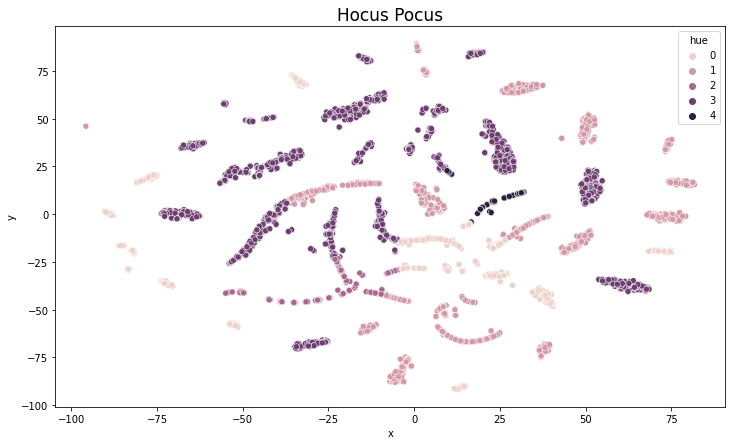

In [202]:
#scatter plot of reduced dimensionality for Hocus Pocus
fig, ax = plt.subplots(figsize = (12,7))
sns.scatterplot(
    x = "x", y="y",
    hue="hue",
    ax = ax,
    data=embedding)
plt.title('Hocus Pocus', fontsize = 17)
plt.savefig('images/tsne_hocuspocus.jpg')